**Trabajo CoderHouse**


 

**Temática:**

-  **Análisis de jugadores del videojuego FIFA 22**


**Profesor:**

-  **Mosquera, Diego**


**Tutora:**

-  **Leija, Shanelly**


**Alumnos:**

-  **Courroux, Pablo**
-  **Guillamondegui, Francisco**

##**Abstract**



***MOTIVACIÓN***

---

Para nuestro trabajo, elegimos el presente dataset con la información de los jugadores del video juego Fifa 22. 
 El motivo por el que definimos emplearlo para nuestro análisis es porque, si bien el mismo contiene información propia de un videojuego, la misma tiene un respaldo real, puesto que toda la información demográfica y etaria, así como también sus características biométricas, están respaldadas por datos provistos en base a los datos reales de cada uno de los jugadores.
 En base a esto, estaremos analizando las distintas características de cada uno de los jugadores, diferenciando entre planteles de jugadores de cancha y de arqueros (puesto que sus "skills" están diferenciados en base a la función que cumplen dentro del campo de juego).


 **AUDIENCIA**


---



El presente análisis, está destinado a todos los aficionados del futbol, como así tambien a aquellos propios de los juegos de deportes, quienes estén interesados en poder analizar y entender la distribución de las distintas características / features, de cada Jugador / Equipo dentro del videojuego FIFA 22.


**PREGUNTAS / HIPÓTESIS**

---



A continuación planteamos algunas de las hipotesis en torno al análisis del dataset:

-  **¿El salario de cada jugador está alineado al nivel de habilidades que posee?**


- **¿La mayor predominancia de jugadores debería rondar los países donde hay ligas mas competitivas?**

  Fifa está pensado para consumirse en los países donde se acostumbra a seguir más el deporte del fútbol. Los países donde esto ocurre suelen ser aquellos con las ligas más competitivas, Italia, Inglaterra, Portugal, Alemania, Francia, Brasil, Argentina, España, Portugal-

- **En promedio, ¿Los jugadores de cancha ganan mas dinero que los arqueros?**

- **¿Profesionalmente, los jugadores zurdos, tienen mayor éxito que los jugadores diestros?**

**NUESTRO OBJETIVO** 

---
Nuestro objetivo es poder deducir y comprender los componentes principales que hacen que los jugadores tengan "éxito" dentro de la plaforma digital, buscando también desglosar y analizar datos reales en base a distribución de las nóminas de jugadores en función de sus clubes / países y también poder constatar si las estadísticas virtuales, son veraces. Los valores de éstas, están respaldadas por "scouters" de que la compañía FIFA emplea para poder obtener datos basados en hechos y observaciones empíricas.

**CONTEXTO COMERCIAL** 

---

Tal lo mencionado, una de nuestras iniciativas es verificar la veracidad / realidad de los datos y estadísticas aportados. En base esto, queremos verificar si efectivamente las relaciones biométricas que se presentan en la vida real, se condicen con aquellas de los jugadores virtuales. Para esto necesitamos analizar algunas relaciones entre las distintas carácterísticas asignadas en la virtualidad para entender si las mismas están fundadas en la realidad

**PROBLEMA COMERCIAL** 

---

Para responder a los interrogantes que devienen de este análisis, nos basamos en el análisis de datos para poder responder a nuestras hipotesis. Además sumamos algunos análisis que nos permitan identificar también si los jugadores tienen datos biométricos fundados en la realidad.

-  **Identificar si se puede encontrar una relación entre el salario y las habilidades de cada jugador**

- **Detectar cuál es la predominancia de nacionalidad de la mayor cantidad de jugadores de FIFA**

- **Generar un análisis comparativo entre jugadores de cancha y arqueros, para determinar si existe una diferencia salarial entre los mismos**

- **Identificar las proporciones de jugadores diestros o zurdos que han tenido éxito profesionalmente (Ser incluidos en equipos profesionales/selecciones)**

- **Analizar si hay relaciones e información agrupable/clasificable respecto de las características biométricas de jugadores. Tomando el peso de cada uno, contrastándolo con la velocidad y determinadno si podemos identificar patrones o clasificar grupos de jugadores segun estas características**

**CONTEXTO ANALÍTICO** 

---

Previo a avanzar con el análisis exploratorio, debimos tomar un dataset con el detalle de todos los jugadores incluidos en el juego FIFA22, para ello avanzamos con los siguientes pasos

**1- Importar y extraer la información del dataset**

**2- Limpiar el dataset de datos poco representativos, eliminando y remplazando datos nulos/erróneos**

**3- Dividir los data set en base a patrones booleanos para identificar jugadores de cancha y jugadores arqueros**

**4- Generar Variables que nos permitan analizar y compara la información deseada**



**DATOS - COLUMNAS DE INTERÉS** 

---

Al tener un dataset tan masivo (>19000 filas y  >100 columnas, en este apartado solo detallaremos las columnas de mayor influencia para nuestro análisis

- **long_name**: Indica el nombre del jugador
- **player_positions**: Posición en la que juega (Dato que nos permite poder dividir el dataset entre Jugadores de cancha y arqueros)
- **overall**: Provee un "overall" de habilidades de un jugador en un solo número ,que nos permite rápidamente identificar su habilidad
- **wage_eur**: El Salario en Euros.
- **age**: Edad
- **dob**: (Date of Birth: Fecha de nacimiento)
- **weight_kg**: Peso en Kilos
- **nationality_name**: nacionalidad del jugador
- **preferred_foot**: Preferencia de pie (Diestro o zurdo)
- **movement_sprint_speed**: Velocidad de sprint del jugador

#**Preparación de Datos API**

In [1]:
#Instalamos la librería de "Requests" para realizar consultas a la API
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Importamos las librerias que vamos a requerir y hacemos el primer request a la API elegida (Sport Data), la misma provee información de distintos deportes actualizada al día. 
#Permite hasta un tope de 500 request por api key
#En este caso importamos la base de datos de jugadores "Reales" de Argentina que tengan hasta un tope de 80 años (valor elegído para contemplar a todos los jugadores en actividad)
import json
import pandas as pd
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","13"),
   ("max_age","80"),
);

response = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);
print(response.text)

{"query":{"country_id":"13","max_age":"80"},"data":[{"player_id":1184,"firstname":"Javier Alejandro","lastname":"Mascherano","birthday":"1984-06-08","age":38,"weight":73,"height":174,"img":"","country":{"country_id":13,"name":"Argentina","country_code":"ar","continent":"South America"}},{"player_id":2103,"firstname":"Santiago","lastname":"Colombatto","birthday":"1997-01-17","age":25,"weight":71,"height":179,"img":"https:\/\/cdn.sportdataapi.com\/images\/soccer\/players\/50\/4629.png","country":{"country_id":13,"name":"Argentina","country_code":"ar","continent":"South America"}},{"player_id":2209,"firstname":"Lucas Gabriel","lastname":"Masoero Masi","birthday":"1995-02-01","age":27,"weight":null,"height":186,"img":"","country":{"country_id":13,"name":"Argentina","country_code":"ar","continent":"South America"}},{"player_id":2244,"firstname":"Franco Eduardo","lastname":"Mazurek","birthday":"1993-09-24","age":29,"weight":66,"height":166,"img":"","country":{"country_id":13,"name":"Argentin

In [3]:
#La primer dificultad que se presentó fue el hecho de tener mas de un "nested dictionary"
#Para resolver este inconveniente, almacenamos la respuesta que recibimos en una variable, revisamos los valores y mediante a una iteración, 
#recorremos cada valor dentro del dict para asignarlo a un Array
storage = response.json()
storage.values()
columnasData=[]
for key, value in dict.items(storage):
    temp = [key,value]
    columnasData.append(temp)

In [4]:
#Checkeamos como queda el array, buscando el "segundo" elemento ([1]), que es donde se encuentra la información que requerimos
print(columnasData[1])

['data', [{'player_id': 1184, 'firstname': 'Javier Alejandro', 'lastname': 'Mascherano', 'birthday': '1984-06-08', 'age': 38, 'weight': 73, 'height': 174, 'img': '', 'country': {'country_id': 13, 'name': 'Argentina', 'country_code': 'ar', 'continent': 'South America'}}, {'player_id': 2103, 'firstname': 'Santiago', 'lastname': 'Colombatto', 'birthday': '1997-01-17', 'age': 25, 'weight': 71, 'height': 179, 'img': 'https://cdn.sportdataapi.com/images/soccer/players/50/4629.png', 'country': {'country_id': 13, 'name': 'Argentina', 'country_code': 'ar', 'continent': 'South America'}}, {'player_id': 2209, 'firstname': 'Lucas Gabriel', 'lastname': 'Masoero Masi', 'birthday': '1995-02-01', 'age': 27, 'weight': None, 'height': 186, 'img': '', 'country': {'country_id': 13, 'name': 'Argentina', 'country_code': 'ar', 'continent': 'South America'}}, {'player_id': 2244, 'firstname': 'Franco Eduardo', 'lastname': 'Mazurek', 'birthday': '1993-09-24', 'age': 29, 'weight': 66, 'height': 166, 'img': '', '

In [5]:
columnasData[1]

['data',
 [{'player_id': 1184,
   'firstname': 'Javier Alejandro',
   'lastname': 'Mascherano',
   'birthday': '1984-06-08',
   'age': 38,
   'weight': 73,
   'height': 174,
   'img': '',
   'country': {'country_id': 13,
    'name': 'Argentina',
    'country_code': 'ar',
    'continent': 'South America'}},
  {'player_id': 2103,
   'firstname': 'Santiago',
   'lastname': 'Colombatto',
   'birthday': '1997-01-17',
   'age': 25,
   'weight': 71,
   'height': 179,
   'img': 'https://cdn.sportdataapi.com/images/soccer/players/50/4629.png',
   'country': {'country_id': 13,
    'name': 'Argentina',
    'country_code': 'ar',
    'continent': 'South America'}},
  {'player_id': 2209,
   'firstname': 'Lucas Gabriel',
   'lastname': 'Masoero Masi',
   'birthday': '1995-02-01',
   'age': 27,
   'weight': None,
   'height': 186,
   'img': '',
   'country': {'country_id': 13,
    'name': 'Argentina',
    'country_code': 'ar',
    'continent': 'South America'}},
  {'player_id': 2244,
   'firstname': '

In [6]:
#Asignamos esta información a una variable
nuevaLista = columnasData[1]

In [7]:
#Importamos la librería Numpy
import numpy as np

In [8]:
print(nuevaLista[1])

[{'player_id': 1184, 'firstname': 'Javier Alejandro', 'lastname': 'Mascherano', 'birthday': '1984-06-08', 'age': 38, 'weight': 73, 'height': 174, 'img': '', 'country': {'country_id': 13, 'name': 'Argentina', 'country_code': 'ar', 'continent': 'South America'}}, {'player_id': 2103, 'firstname': 'Santiago', 'lastname': 'Colombatto', 'birthday': '1997-01-17', 'age': 25, 'weight': 71, 'height': 179, 'img': 'https://cdn.sportdataapi.com/images/soccer/players/50/4629.png', 'country': {'country_id': 13, 'name': 'Argentina', 'country_code': 'ar', 'continent': 'South America'}}, {'player_id': 2209, 'firstname': 'Lucas Gabriel', 'lastname': 'Masoero Masi', 'birthday': '1995-02-01', 'age': 27, 'weight': None, 'height': 186, 'img': '', 'country': {'country_id': 13, 'name': 'Argentina', 'country_code': 'ar', 'continent': 'South America'}}, {'player_id': 2244, 'firstname': 'Franco Eduardo', 'lastname': 'Mazurek', 'birthday': '1993-09-24', 'age': 29, 'weight': 66, 'height': 166, 'img': '', 'country':

In [9]:
lista_Argentina = nuevaLista[1]

In [10]:
lista_Argentina

[{'player_id': 1184,
  'firstname': 'Javier Alejandro',
  'lastname': 'Mascherano',
  'birthday': '1984-06-08',
  'age': 38,
  'weight': 73,
  'height': 174,
  'img': '',
  'country': {'country_id': 13,
   'name': 'Argentina',
   'country_code': 'ar',
   'continent': 'South America'}},
 {'player_id': 2103,
  'firstname': 'Santiago',
  'lastname': 'Colombatto',
  'birthday': '1997-01-17',
  'age': 25,
  'weight': 71,
  'height': 179,
  'img': 'https://cdn.sportdataapi.com/images/soccer/players/50/4629.png',
  'country': {'country_id': 13,
   'name': 'Argentina',
   'country_code': 'ar',
   'continent': 'South America'}},
 {'player_id': 2209,
  'firstname': 'Lucas Gabriel',
  'lastname': 'Masoero Masi',
  'birthday': '1995-02-01',
  'age': 27,
  'weight': None,
  'height': 186,
  'img': '',
  'country': {'country_id': 13,
   'name': 'Argentina',
   'country_code': 'ar',
   'continent': 'South America'}},
 {'player_id': 2244,
  'firstname': 'Franco Eduardo',
  'lastname': 'Mazurek',
  'bi

In [11]:
#Usamos la librería Pandas para crear un dataframe a partir de los valores extraidos de la Request, para todos los jugadores de "Argentina"
df_Argentina = pd.DataFrame(lista_Argentina)

In [12]:
#Checkeamos el resultado del dataframe creado. 
df_Argentina

player_id         firstname      lastname    birthday   age  weight  \
0         1184  Javier Alejandro    Mascherano  1984-06-08  38.0    73.0   
1         2103          Santiago    Colombatto  1997-01-17  25.0    71.0   
2         2209     Lucas Gabriel  Masoero Masi  1995-02-01  27.0     NaN   
3         2244    Franco Eduardo       Mazurek  1993-09-24  29.0    66.0   
4         2581  Esteban Fernando      Sachetti  1995-11-21  27.0    68.0   
..         ...               ...           ...         ...   ...     ...   
993      25072     Gabriel Cesar     Florentin  1999-03-13  23.0     NaN   
994      25074     Kevin Facundo     Gutierrez  1997-06-03  25.0    65.0   
995      25076      Alan Nicolas     Marinelli  1999-04-07  23.0    70.0   
996      25079   Matias Ezequiel       Blengio  1995-04-14  27.0     NaN   
997      25081      Brian Alexis        Leizza  2000-04-28  22.0     NaN   

     height                                                img  \
0     174.0                                                      
1     179.0  https://cdn.sportdataapi.com/images/soccer/pla...   
2     186.0                                                      
3     166.0                                                      
4     170.0                                                      
..      ...                                                ...   
993     NaN                                                      
994   167.0                                                      
995   174.0                                                      
996     NaN                                                      
997     NaN                                                      

                                               country  
0    {'country_id': 13, 'name': 'Argentina', 'count...  
1    {'country_id': 13, 'name': 'Argentina', 'count...  
2    {'country_id': 13, 'name': 'Argentina', 'count...  
3    {'country_id': 13, 'name': 'Argentina', 'count...  
4    {'country_id': 13, 'name': 'Argentina', 'count...  
..                                                 ...  
993  {'country_id': 13, 'name': 'Argentina', 'count...  
994  {'country_id': 13, 'name': 'Argentina', 'count...  
995  {'country_id': 13, 'name': 'Argentina', 'count...  
996  {'country_id': 13, 'name': 'Argentina', 'count...  
997  {'country_id': 13, 'name': 'Argentina', 'count...  

[998 rows x 9 columns]

In [13]:
#Realizamos el mismo procedimiento con los países de mayor "trascendencia" en el deporte del futbol, para poder ampliar la cantidad de datos de nuestro dataset
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","25"),
   ("max_age","80"),
);

response1 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

response1 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage1 = response1.json()
storage1.values()
columnasData1=[]
for key, value in dict.items(storage1):
    temp = [key,value]
    columnasData1.append(temp)
nuevaLista1 = columnasData1[1]
lista_Brazil = nuevaLista1[1]
df_Brazil = pd.DataFrame(lista_Brazil)
df_Brazil


player_id           firstname               lastname    birthday  age  \
0          680             Ricardo  dos Santos Nascimento  1987-02-07   35   
1         1480            Wallison            Nunes Silva  2001-07-24   21   
2         1490             William   Rodrigues de Freitas  1993-09-09   29   
3         1499             Wallace     Menezes dos Santos  1998-06-23   24   
4         1500  Ronivaldo Bernardo                  Sales  1989-03-24   33   
..         ...                 ...                    ...         ...  ...   
918      24790         Bruno Cunha             Cantanhede  1993-07-22   29   
919      24797  John Victor Maciel                Furtado  1996-02-13   26   
920      24806             Tailson        Pinto Goncalves  1999-03-05   23   
921      24812     Wagner Leonardo       Calvelo de Souza  1999-07-23   23   
922      24820      Lucas Henrique        Ferreira Venuto  1995-01-14   27   

     weight  height                                                img  \
0      80.0   190.0  https://cdn.sportdataapi.com/images/soccer/pla...   
1       NaN     NaN                                                      
2      71.0   181.0                                                      
3       NaN   179.0                                                      
4      76.0   173.0                                                      
..      ...     ...                                                ...   
918    74.0   184.0                                                      
919    83.0   196.0  https://cdn.sportdataapi.com/images/soccer/pla...   
920    65.0   172.0  https://cdn.sportdataapi.com/images/soccer/pla...   
921     NaN     NaN                                                      
922    60.0   164.0  https://cdn.sportdataapi.com/images/soccer/pla...   

                                               country  
0    {'country_id': 25, 'name': 'Brazil', 'country_...  
1    {'country_id': 25, 'name': 'Brazil', 'country_...  
2    {'country_id': 25, 'name': 'Brazil', 'country_...  
3    {'country_id': 25, 'name': 'Brazil', 'country_...  
4    {'country_id': 25, 'name': 'Brazil', 'country_...  
..                                                 ...  
918  {'country_id': 25, 'name': 'Brazil', 'country_...  
919  {'country_id': 25, 'name': 'Brazil', 'country_...  
920  {'country_id': 25, 'name': 'Brazil', 'country_...  
921  {'country_id': 25, 'name': 'Brazil', 'country_...  
922  {'country_id': 25, 'name': 'Brazil', 'country_...  

[923 rows x 9 columns]

In [14]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","46"),
   ("max_age","80"),
);

response2 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage2 = response2.json()
storage2.values()
columnasData2=[]
for key, value in dict.items(storage2):
    temp = [key,value]
    columnasData2.append(temp)
nuevaLista2 = columnasData2[1]
lista_France = nuevaLista2[1]
df_France = pd.DataFrame(lista_France)
df_France


player_id firstname  lastname    birthday   age  weight  height  \
0          378     Joris     Delle  1990-03-29  32.0    84.0   191.0   
1         1668   Antoine   Bernede  1999-05-26  23.0    74.0   177.0   
2         1913   Nicolas    Gavory  1995-02-16  27.0    76.0   182.0   
3         1925    Elisha     Owusu  1997-11-07  25.0    62.0   182.0   
4         1932   Giulian  Biancone  2000-03-31  22.0     NaN   187.0   
..         ...       ...       ...         ...   ...     ...     ...   
830      24262    Thomas     Lemar  1995-11-12  27.0    63.0   171.0   
831      24267  Abdellah    Zoubir  1991-12-05  30.0    75.0   180.0   
832      24275   William      Remy  1991-04-04  31.0    79.0   184.0   
833      24281    Yasser   Larouci  2001-01-01  21.0     NaN     NaN   
834      24289     Billy  Koumetio  2002-11-14  20.0     NaN     NaN   

                                                   img  \
0                                                        
1                                                        
2    https://cdn.sportdataapi.com/images/soccer/pla...   
3                                                        
4                                                        
..                                                 ...   
830                                                      
831                                                      
832                                                      
833                                                      
834                                                      

                                               country  
0    {'country_id': 46, 'name': 'France', 'country_...  
1    {'country_id': 46, 'name': 'France', 'country_...  
2    {'country_id': 46, 'name': 'France', 'country_...  
3    {'country_id': 46, 'name': 'France', 'country_...  
4    {'country_id': 46, 'name': 'France', 'country_...  
..                                                 ...  
830  {'country_id': 46, 'name': 'France', 'country_...  
831  {'country_id': 46, 'name': 'France', 'country_...  
832  {'country_id': 46, 'name': 'France', 'country_...  
833  {'country_id': 46, 'name': 'France', 'country_...  
834  {'country_id': 46, 'name': 'France', 'country_...  

[835 rows x 9 columns]

In [15]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","42"),
   ("max_age","80"),
);

response3 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage3 = response3.json()
storage3.values()
columnasData3=[]
for key, value in dict.items(storage3):
    temp = [key,value]
    columnasData3.append(temp)
nuevaLista3 = columnasData3[1]
lista_England = nuevaLista3[1]
df_England = pd.DataFrame(lista_England)
df_England

player_id                firstname      lastname    birthday   age  \
0          2497  Jay-Alistaire Frederick       Simpson  1988-12-01  33.0   
1          2570                Simranjit  Singh Thandi  1999-10-11  23.0   
2          2616          Jason David Ian      Puncheon  1986-06-26  36.0   
3          2847            Aaron William     Cresswell  1989-12-15  32.0   
4          2849                   Declan          Rice  1999-01-14  23.0   
...         ...                      ...           ...         ...   ...   
1264      25804                   Harvey       Elliott  2003-04-04  19.0   
1265      25807                   Layton       Stewart  2002-09-03  20.0   
1266      25812                    James        Norris  2003-04-04  19.0   
1267      25815           Benjamin Harry  Winterbottom  2001-07-16  21.0   
1268      25818                   Thomas          Hill  2002-10-13  20.0   

      weight  height img                                            country  
0       85.0   180.0      {'country_id': 42, 'name': 'England', 'country...  
1        NaN     NaN      {'country_id': 42, 'name': 'England', 'country...  
2       70.0   173.0      {'country_id': 42, 'name': 'England', 'country...  
3       66.0   170.0      {'country_id': 42, 'name': 'England', 'country...  
4       80.0   185.0      {'country_id': 42, 'name': 'England', 'country...  
...      ...     ...  ..                                                ...  
1264     NaN     NaN      {'country_id': 42, 'name': 'England', 'country...  
1265     NaN     NaN      {'country_id': 42, 'name': 'England', 'country...  
1266     NaN     NaN      {'country_id': 42, 'name': 'England', 'country...  
1267     NaN     NaN      {'country_id': 42, 'name': 'England', 'country...  
1268     NaN     NaN      {'country_id': 42, 'name': 'England', 'country...  

[1269 rows x 9 columns]

In [16]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","48"),
   ("max_age","80"),
);

response4 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage4 = response4.json()
storage4.values()
columnasData4=[]
for key, value in dict.items(storage4):
    temp = [key,value]
    columnasData4.append(temp)
nuevaLista4 = columnasData4[1]
lista_Germany = nuevaLista4[1]
df_Germany = pd.DataFrame(lista_Germany)
df_Germany

player_id  firstname       lastname    birthday   age  weight  height  \
0          1417     Daniel        Jelisic  2000-02-18  22.0     NaN   178.0   
1          1425     Fabian          Benko  1998-06-05  24.0    74.0   180.0   
2          1488      Lukas       Fadinger  2000-09-27  22.0     NaN   172.0   
3          1513      Anour  El Moukhantir  1997-08-30  25.0     NaN   178.0   
4          1540     Julian     Von Haacke  1994-02-14  28.0    76.0   181.0   
...         ...        ...            ...         ...   ...     ...     ...   
1348      25832  Jan-Lukas          Liehr  1997-08-11  25.0     NaN   184.0   
1349      25833      Kevin           Dabo  1993-08-22  29.0     NaN   184.0   
1350      25834  Christian         Eggert  1986-01-16  36.0    76.0   180.0   
1351      25835      Marko          Marin  1989-03-13  33.0    67.0   170.0   
1352      25836     Atakan       Akkaynak  1999-01-05  23.0    73.0   180.0   

     img                                            country  
0         {'country_id': 48, 'name': 'Germany', 'country...  
1         {'country_id': 48, 'name': 'Germany', 'country...  
2         {'country_id': 48, 'name': 'Germany', 'country...  
3         {'country_id': 48, 'name': 'Germany', 'country...  
4         {'country_id': 48, 'name': 'Germany', 'country...  
...   ..                                                ...  
1348      {'country_id': 48, 'name': 'Germany', 'country...  
1349      {'country_id': 48, 'name': 'Germany', 'country...  
1350      {'country_id': 48, 'name': 'Germany', 'country...  
1351      {'country_id': 48, 'name': 'Germany', 'country...  
1352      {'country_id': 48, 'name': 'Germany', 'country...  

[1353 rows x 9 columns]

In [17]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","62"),
   ("max_age","80"),
);

response5 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage5 = response5.json()
storage5.values()
columnasData5=[]
for key, value in dict.items(storage5):
    temp = [key,value]
    columnasData5.append(temp)
nuevaLista5 = columnasData5[1]
lista_Italy = nuevaLista5[1]
df_Italy = pd.DataFrame(lista_Italy)
df_Italy

player_id       firstname           lastname    birthday  age  weight  \
0         2240         Stefano           Beltrame  1993-02-08   29    73.0   
1         2894           Moise               Kean  2000-02-28   22    72.0   
2         2904         Patrick            Cutrone  1998-01-03   24    75.0   
3         2952      Jorge Luiz       Frello Filho  1991-12-20   30    67.0   
4         3185   Angelo Obinze            Ogbonna  1988-05-23   34    86.0   
..         ...             ...                ...         ...  ...     ...   
846      24416         Roberto            Piccoli  2001-01-27   21     NaN   
847      24423          Nicolo          Cambiaghi  2000-12-28   21     NaN   
848      24431        Giuseppe             Pisano  1988-04-26   34    80.0   
849      24437  Tiziano Pietro  Lo Iacono Mayanga  1994-01-24   28     NaN   
850      24445    Sergio Baris          Gucciardo  1999-04-19   23     NaN   

     height                                                img  \
0     183.0                                                      
1     182.0                                                      
2     183.0                                                      
3     180.0                                                      
4     191.0                                                      
..      ...                                                ...   
846     NaN  https://cdn.sportdataapi.com/images/soccer/pla...   
847     NaN                                                      
848   188.0                                                      
849   175.0                                                      
850   173.0                                                      

                                               country  
0    {'country_id': 62, 'name': 'Italy', 'country_c...  
1    {'country_id': 62, 'name': 'Italy', 'country_c...  
2    {'country_id': 62, 'name': 'Italy', 'country_c...  
3    {'country_id': 62, 'name': 'Italy', 'country_c...  
4    {'country_id': 62, 'name': 'Italy', 'country_c...  
..                                                 ...  
846  {'country_id': 62, 'name': 'Italy', 'country_c...  
847  {'country_id': 62, 'name': 'Italy', 'country_c...  
848  {'country_id': 62, 'name': 'Italy', 'country_c...  
849  {'country_id': 62, 'name': 'Italy', 'country_c...  
850  {'country_id': 62, 'name': 'Italy', 'country_c...  

[851 rows x 9 columns]

In [18]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","83"),
   ("max_age","80"),
);

response6 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage6 = response6.json()
storage6.values()
columnasData6=[]
for key, value in dict.items(storage6):
    temp = [key,value]
    columnasData6.append(temp)
nuevaLista6 = columnasData6[1]
lista_Netherlands = nuevaLista6[1]
df_Netherlands = pd.DataFrame(lista_Netherlands)
df_Netherlands

player_id    firstname      lastname    birthday   age  weight  height  \
0          428        Peter  Leeuwenburgh  1994-03-23  28.0    87.0   196.0   
1          449          Boy       De Jong  1994-04-10  28.0    76.0   182.0   
2          684   Christofer  Gurkan David  1993-03-06  29.0    71.0   170.0   
3         1510        Caner        Cavlan  1992-02-05  30.0    65.0   175.0   
4         1884         Ruud        Vormer  1988-05-11  34.0    80.0   178.0   
..         ...          ...           ...         ...   ...     ...     ...   
580      23054       Sander      van Looy  1997-05-29  25.0    74.0   178.0   
581      23058        Jules     Reimerink  1989-09-30  33.0    86.0   186.0   
582      23063  Bartholomew   Schenkeveld  1991-08-28  31.0    83.0   185.0   
583      23071        Marco    Van Ginkel  1992-12-01  29.0    82.0   186.0   
584      23075    Ian Ethan       Maatsen  2002-03-10  20.0     NaN   159.0   

                                                   img  \
0    https://cdn.sportdataapi.com/images/soccer/pla...   
1                                                        
2                                                        
3                                                        
4    https://cdn.sportdataapi.com/images/soccer/pla...   
..                                                 ...   
580                                                      
581                                                      
582                                                      
583                                                      
584                                                      

                                               country  
0    {'country_id': 83, 'name': 'Netherlands', 'cou...  
1    {'country_id': 83, 'name': 'Netherlands', 'cou...  
2    {'country_id': 83, 'name': 'Netherlands', 'cou...  
3    {'country_id': 83, 'name': 'Netherlands', 'cou...  
4    {'country_id': 83, 'name': 'Netherlands', 'cou...  
..                                                 ...  
580  {'country_id': 83, 'name': 'Netherlands', 'cou...  
581  {'country_id': 83, 'name': 'Netherlands', 'cou...  
582  {'country_id': 83, 'name': 'Netherlands', 'cou...  
583  {'country_id': 83, 'name': 'Netherlands', 'cou...  
584  {'country_id': 83, 'name': 'Netherlands', 'cou...  

[585 rows x 9 columns]

In [19]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","98"),
   ("max_age","80"),
);

response7 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage7 = response7.json()
storage7.values()
columnasData7=[]
for key, value in dict.items(storage7):
    temp = [key,value]
    columnasData7.append(temp)
nuevaLista7 = columnasData7[1]
lista_Portugal = nuevaLista7[1]
df_Portugal = pd.DataFrame(lista_Portugal)
df_Portugal

player_id                firstname           lastname    birthday  age  \
0         1140          Dyego Wilverson     Ferreira Sousa  1989-09-14   33   
1         1954          Aurelio Gabriel       Ulineia Buta  1997-02-10   25   
2         1963           Nurio Domingos     Matias Fortuna  1995-03-24   27   
3         1997            Avelino Jorge    Filipe Teixeira  1986-08-27   36   
4         2054                    Diogo      Lucas Queiros  1999-01-05   23   
..         ...                      ...                ...         ...  ...   
560      24720  Felix Alexandre Andrade    Sanches Correia  2001-01-22   21   
561      24728              Luis Rafael       Soares Alves  1995-05-09   27   
562      24738         Filipe Alexandre             Morais  1985-11-21   37   
563      24748             Antonio Jose  Pinherio Carvalho  1993-01-14   29   
564      24764                 Cristian         Ioan Ponde  1995-01-26   27   

     weight  height                                                img  \
0      84.0   190.0                                                      
1      61.0   169.0  https://cdn.sportdataapi.com/images/soccer/pla...   
2      70.0   177.0                                                      
3      86.0   188.0  https://cdn.sportdataapi.com/images/soccer/pla...   
4      80.0   188.0                                                      
..      ...     ...                                                ...   
560     NaN     NaN                                                      
561    74.0   184.0                                                      
562    73.0   175.0                                                      
563    66.0   174.0                                                      
564    75.0   179.0                                                      

                                               country  
0    {'country_id': 98, 'name': 'Portugal', 'countr...  
1    {'country_id': 98, 'name': 'Portugal', 'countr...  
2    {'country_id': 98, 'name': 'Portugal', 'countr...  
3    {'country_id': 98, 'name': 'Portugal', 'countr...  
4    {'country_id': 98, 'name': 'Portugal', 'countr...  
..                                                 ...  
560  {'country_id': 98, 'name': 'Portugal', 'countr...  
561  {'country_id': 98, 'name': 'Portugal', 'countr...  
562  {'country_id': 98, 'name': 'Portugal', 'countr...  
563  {'country_id': 98, 'name': 'Portugal', 'countr...  
564  {'country_id': 98, 'name': 'Portugal', 'countr...  

[565 rows x 9 columns]

In [20]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","113"),
   ("max_age","80"),
);

response8 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage8 = response8.json()
storage8.values()
columnasData8=[]
for key, value in dict.items(storage8):
    temp = [key,value]
    columnasData8.append(temp)
nuevaLista8 = columnasData8[1]
lista_Spain = nuevaLista8[1]
df_Spain = pd.DataFrame(lista_Spain)
df_Spain

player_id        firstname           lastname    birthday   age  weight  \
0         1444          Alberto         Prada Vega  1989-01-19  33.0    79.0   
1         1449            Jorge     Pelaez Sanchez  1996-09-29  26.0    79.0   
2         1699             Juan    Dominguez Lamas  1990-01-08  32.0    71.0   
3         1986            Jordi          Amat Maas  1992-03-21  30.0    80.0   
4         1993              Jon  Bautista Orgilles  1995-07-03  27.0    72.0   
..         ...              ...                ...         ...   ...     ...   
912      24789            Aitor       Monroy Rueda  1987-10-18  35.0    77.0   
913      24798        Francisco        Medina Luna  1981-05-26  41.0    69.0   
914      24804     Nestor Jesus   Gordillo Benitez  1989-08-28  33.0     NaN   
915      24811  Francisco David     Grande Serrano  1991-02-08  31.0     NaN   
916      24819           Sergio   Akieme Rodriguez  1997-12-16  24.0    65.0   

     height img                                            country  
0     185.0      {'country_id': 113, 'name': 'Spain', 'country_...  
1     188.0      {'country_id': 113, 'name': 'Spain', 'country_...  
2     181.0      {'country_id': 113, 'name': 'Spain', 'country_...  
3     184.0      {'country_id': 113, 'name': 'Spain', 'country_...  
4     180.0      {'country_id': 113, 'name': 'Spain', 'country_...  
..      ...  ..                                                ...  
912   180.0      {'country_id': 113, 'name': 'Spain', 'country_...  
913   179.0      {'country_id': 113, 'name': 'Spain', 'country_...  
914   169.0      {'country_id': 113, 'name': 'Spain', 'country_...  
915   183.0      {'country_id': 113, 'name': 'Spain', 'country_...  
916   175.0      {'country_id': 113, 'name': 'Spain', 'country_...  

[917 rows x 9 columns]

In [21]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","21"),
   ("max_age","80"),
);

response9 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage9 = response9.json()
storage9.values()
columnasData9=[]
for key, value in dict.items(storage9):
    temp = [key,value]
    columnasData9.append(temp)
nuevaLista9 = columnasData9[1]
lista_Belgium = nuevaLista9[1]
df_Belgium = pd.DataFrame(lista_Belgium)
df_Belgium

player_id            firstname           lastname    birthday  age  \
0         1252              Yannick  Ferreira Carrasco  1993-09-04   29   
1         1881  Simon Luc Hildebert           Mignolet  1988-03-06   34   
2         1882                 Hans            Vanaken  1992-08-24   30   
3         1883    Mukoni Mata Pedro           Lourenco  1992-11-07   30   
4         1885              Brandon            Mechele  1993-01-28   29   
..         ...                  ...                ...         ...  ...   
258      24928              Thibaud          Verlinden  1999-07-09   23   
259      24934              Antoine            Bernier  1997-09-10   25   
260      24938                Sabir           Bougrine  1996-07-10   26   
261      24944             Jonathan            Benteke  1995-01-01   27   
262      24949                Boris            Lambert  2000-04-10   22   

     weight  height                                                img  \
0      67.0   180.0                                                      
1      87.0   193.0  https://cdn.sportdataapi.com/images/soccer/pla...   
2      77.0   194.0  https://cdn.sportdataapi.com/images/soccer/pla...   
3      72.0   180.0  https://cdn.sportdataapi.com/images/soccer/pla...   
4      81.0   188.0  https://cdn.sportdataapi.com/images/soccer/pla...   
..      ...     ...                                                ...   
258    65.0   173.0                                                      
259    68.0   170.0                                                      
260    70.0   173.0                                                      
261    77.0   186.0                                                      
262     NaN     NaN                                                      

                                               country  
0    {'country_id': 21, 'name': 'Belgium', 'country...  
1    {'country_id': 21, 'name': 'Belgium', 'country...  
2    {'country_id': 21, 'name': 'Belgium', 'country...  
3    {'country_id': 21, 'name': 'Belgium', 'country...  
4    {'country_id': 21, 'name': 'Belgium', 'country...  
..                                                 ...  
258  {'country_id': 21, 'name': 'Belgium', 'country...  
259  {'country_id': 21, 'name': 'Belgium', 'country...  
260  {'country_id': 21, 'name': 'Belgium', 'country...  
261  {'country_id': 21, 'name': 'Belgium', 'country...  
262  {'country_id': 21, 'name': 'Belgium', 'country...  

[263 rows x 9 columns]

In [22]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","124"),
   ("max_age","80"),
);

response10 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage10 = response10.json()
storage10.values()
columnasData10=[]
for key, value in dict.items(storage10):
    temp = [key,value]
    columnasData10.append(temp)
nuevaLista10 = columnasData10[1]
lista_Uruguay = nuevaLista10[1]
df_Uruguay = pd.DataFrame(lista_Uruguay)
df_Uruguay

player_id        firstname           lastname    birthday   age  weight  \
0          497   Leandro Gaston             Sirino  1991-02-22  31.0    60.0   
1          652         Mauricio     Affonso Prieto  1992-01-26  30.0    73.0   
2         1541      Maximiliano     Moreira Romero  1994-06-11  28.0     NaN   
3         1887         Federico    Ricca Rostagnol  1994-12-01  27.0    73.0   
4         2063  Gary Christofer  Kagelmacher Perez  1988-04-21  34.0    80.0   
..         ...              ...                ...         ...   ...     ...   
505      24855         Federico   Gallego Revetria  1990-06-13  32.0    76.0   
506      24857    Nubel Joaquin     Silva Gonzalez  1997-07-19  25.0     NaN   
507      24862   Richard Andres      Dorrego Coito  1995-02-01  27.0    72.0   
508      24869     Manuel Elias   Fernandez Guzman  1989-01-25  33.0    79.0   
509      24876  Ronald Federico    Araujo da Silva  1999-03-07  23.0    79.0   

     height                                                img  \
0     166.0  https://cdn.sportdataapi.com/images/soccer/pla...   
1     192.0                                                      
2     173.0                                                      
3     178.0  https://cdn.sportdataapi.com/images/soccer/pla...   
4     182.0                                                      
..      ...                                                ...   
505   177.0                                                      
506   195.0                                                      
507   176.0                                                      
508   181.0                                                      
509   185.0                                                      

                                               country  
0    {'country_id': 124, 'name': 'Uruguay', 'countr...  
1    {'country_id': 124, 'name': 'Uruguay', 'countr...  
2    {'country_id': 124, 'name': 'Uruguay', 'countr...  
3    {'country_id': 124, 'name': 'Uruguay', 'countr...  
4    {'country_id': 124, 'name': 'Uruguay', 'countr...  
..                                                 ...  
505  {'country_id': 124, 'name': 'Uruguay', 'countr...  
506  {'country_id': 124, 'name': 'Uruguay', 'countr...  
507  {'country_id': 124, 'name': 'Uruguay', 'countr...  
508  {'country_id': 124, 'name': 'Uruguay', 'countr...  
509  {'country_id': 124, 'name': 'Uruguay', 'countr...  

[510 rows x 9 columns]

In [23]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","32"),
   ("max_age","80"),
);

response11 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage11 = response11.json()
storage11.values()
columnasData11=[]
for key, value in dict.items(storage11):
    temp = [key,value]
    columnasData11.append(temp)
nuevaLista11 = columnasData11[1]
lista_Colombia = nuevaLista11[1]
df_Colombia = pd.DataFrame(lista_Colombia)
df_Colombia

player_id        firstname         lastname    birthday   age  weight  \
0          615   David Leonardo    Castro Cortes  1989-05-12  33.0    80.0   
1         1898       Jhon Janer   Lucumi Bonilla  1998-06-26  24.0    80.0   
2         1969  Carlos Eccehomo  Cuesta Figueroa  1999-03-09  23.0    67.0   
3         2020      Eder Fabian  Alvarez Balanta  1993-02-28  29.0    84.0   
4         2744   Jorge Leonardo    Obregon Rojas  1997-03-29  25.0    73.0   
..         ...              ...              ...         ...   ...     ...   
528      22711       Jose David     Leudo Romana  1993-11-09  29.0    85.0   
529      22713          Jersson         Gonzalez  2001-09-15  21.0     NaN   
530      22718    Hector Andres  Quinones Cortes  1992-03-17  30.0     NaN   
531      22723    Carlos Manuel  Cortes Barreiro        None   NaN     NaN   
532      22728       Luis David  Quintero Zuniga  1998-01-29  24.0     NaN   

     height                                                img  \
0     183.0                                                      
1     188.0  https://cdn.sportdataapi.com/images/soccer/pla...   
2     178.0  https://cdn.sportdataapi.com/images/soccer/pla...   
3     181.0  https://cdn.sportdataapi.com/images/soccer/pla...   
4     180.0                                                      
..      ...                                                ...   
528   183.0                                                      
529     NaN                                                      
530   177.0                                                      
531     NaN                                                      
532     NaN                                                      

                                               country  
0    {'country_id': 32, 'name': 'Colombia', 'countr...  
1    {'country_id': 32, 'name': 'Colombia', 'countr...  
2    {'country_id': 32, 'name': 'Colombia', 'countr...  
3    {'country_id': 32, 'name': 'Colombia', 'countr...  
4    {'country_id': 32, 'name': 'Colombia', 'countr...  
..                                                 ...  
528  {'country_id': 32, 'name': 'Colombia', 'countr...  
529  {'country_id': 32, 'name': 'Colombia', 'countr...  
530  {'country_id': 32, 'name': 'Colombia', 'countr...  
531  {'country_id': 32, 'name': 'Colombia', 'countr...  
532  {'country_id': 32, 'name': 'Colombia', 'countr...  

[533 rows x 9 columns]

In [24]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","95"),
   ("max_age","80"),
);

response12 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage12 = response12.json()
storage12.values()
columnasData12=[]
for key, value in dict.items(storage12):
    temp = [key,value]
    columnasData12.append(temp)
nuevaLista12 = columnasData12[1]
lista_Peru = nuevaLista12[1]
df_Peru = pd.DataFrame(lista_Peru)
df_Peru

player_id        firstname               lastname    birthday  age  \
0         4267     Miguel Angel        Trauco Saavedra  1992-08-25   30   
1         4483         Cristian      Benavente Bristol  1994-05-19   28   
2         7472   Luis Jan Piers   Advincula Castrillon  1990-03-02   32   
3         7557  Jeisson Enrique      Martinez Aranibar  1994-12-28   27   
4         8449  Victor Yoshimar           Yotun Flores  1990-04-07   32   
..         ...              ...                    ...         ...  ...   
362      21488    Eder Benjamin          Villalta Mori  2000-07-24   22   
363      21495  Jhilmar Augusto         Lobaton Espejo  1998-05-22   24   
364      21501     Jose Aurelio  Gonzales Vigil Bentin  1996-03-01   26   
365      21510    Marcelo Jesus    Gallardo Altamirano  2000-09-06   22   
366      21520     Flavio Cesar       Ramirez Olivares  1996-02-17   26   

     weight  height                                                img  \
0      74.0   169.0                                                      
1      68.0   173.0                                                      
2      82.0   178.0                                                      
3       NaN   180.0                                                      
4      68.0   173.0                                                      
..      ...     ...                                                ...   
362    74.0   178.0                                                      
363     NaN     NaN                                                      
364    77.0   176.0  https://cdn.sportdataapi.com/images/soccer/pla...   
365     NaN     NaN                                                      
366    65.0   170.0                                                      

                                               country  
0    {'country_id': 95, 'name': 'Peru', 'country_co...  
1    {'country_id': 95, 'name': 'Peru', 'country_co...  
2    {'country_id': 95, 'name': 'Peru', 'country_co...  
3    {'country_id': 95, 'name': 'Peru', 'country_co...  
4    {'country_id': 95, 'name': 'Peru', 'country_co...  
..                                                 ...  
362  {'country_id': 95, 'name': 'Peru', 'country_co...  
363  {'country_id': 95, 'name': 'Peru', 'country_co...  
364  {'country_id': 95, 'name': 'Peru', 'country_co...  
365  {'country_id': 95, 'name': 'Peru', 'country_co...  
366  {'country_id': 95, 'name': 'Peru', 'country_co...  

[367 rows x 9 columns]

In [25]:
import requests

headers = { 
  "apikey": "59297ae0-4e9a-11ed-969a-93af2c4f56ad"}

params = (
   ("country_id","39"),
   ("max_age","80"),
);

response13 = requests.get('https://app.sportdataapi.com/api/v1/soccer/players', headers=headers, params=params);

storage13 = response13.json()
storage13.values()
columnasData13=[]
for key, value in dict.items(storage13):
    temp = [key,value]
    columnasData13.append(temp)
nuevaLista13 = columnasData13[1]
lista_Ecuador = nuevaLista13[1]
df_Ecuador = pd.DataFrame(lista_Ecuador)
df_Ecuador

player_id          firstname          lastname    birthday  age  weight  \
0         3533  Jefferson Antonio      Montero Vite  1989-09-01   33    68.0   
1         5626    Felipe Salvador    Caicedo Corozo  1988-09-05   34    81.0   
2         8110      Arturo Rafael         Mina Meza  1990-10-08   32    91.0   
3         8468     Enner Remberto   Valencia Lastra  1989-11-04   33    75.0   
4         8518  Jefferson Alfredo  Intriago Mendoza  1996-06-04   26    75.0   
..         ...                ...               ...         ...  ...     ...   
312      24802           Leonardo    Campana Romero  2000-07-24   22     NaN   
313      24810   Fernando Vicente   Gaibor Orellana  1991-10-08   31    75.0   
314      24816   Jhonathan Jeison    Lucas Figueroa  1996-01-28   26    70.0   
315      24823       Dubar Adrian  Enriquez Sanchez  1992-08-10   30    70.0   
316      24832       Eduar Ayrton   Preciado Garcia  1994-07-17   28    78.0   

     height                                                img  \
0     170.0                                                      
1     183.0  https://cdn.sportdataapi.com/images/soccer/pla...   
2     192.0                                                      
3     177.0                                                      
4     172.0  https://cdn.sportdataapi.com/images/soccer/pla...   
..      ...                                                ...   
312   187.0                                                      
313   178.0                                                      
314   179.0                                                      
315   180.0                                                      
316   180.0                                                      

                                               country  
0    {'country_id': 39, 'name': 'Ecuador', 'country...  
1    {'country_id': 39, 'name': 'Ecuador', 'country...  
2    {'country_id': 39, 'name': 'Ecuador', 'country...  
3    {'country_id': 39, 'name': 'Ecuador', 'country...  
4    {'country_id': 39, 'name': 'Ecuador', 'country...  
..                                                 ...  
312  {'country_id': 39, 'name': 'Ecuador', 'country...  
313  {'country_id': 39, 'name': 'Ecuador', 'country...  
314  {'country_id': 39, 'name': 'Ecuador', 'country...  
315  {'country_id': 39, 'name': 'Ecuador', 'country...  
316  {'country_id': 39, 'name': 'Ecuador', 'country...  

[317 rows x 9 columns]

In [26]:
#Una vez que tenemos todos los dataframes de los respectivos países, concatenamos todos para conformar un solo "gran" dataframe
df_players = pd.concat([df_Argentina,df_Belgium,df_Brazil, df_Colombia, df_Ecuador, df_England,df_France,df_Germany, df_Italy, df_Netherlands, df_Peru, df_Portugal, df_Spain, df_Uruguay])

In [27]:
#Checkeamos el resultado
df_players

player_id         firstname          lastname    birthday   age  weight  \
0         1184  Javier Alejandro        Mascherano  1984-06-08  38.0    73.0   
1         2103          Santiago        Colombatto  1997-01-17  25.0    71.0   
2         2209     Lucas Gabriel      Masoero Masi  1995-02-01  27.0     NaN   
3         2244    Franco Eduardo           Mazurek  1993-09-24  29.0    66.0   
4         2581  Esteban Fernando          Sachetti  1995-11-21  27.0    68.0   
..         ...               ...               ...         ...   ...     ...   
505      24855          Federico  Gallego Revetria  1990-06-13  32.0    76.0   
506      24857     Nubel Joaquin    Silva Gonzalez  1997-07-19  25.0     NaN   
507      24862    Richard Andres     Dorrego Coito  1995-02-01  27.0    72.0   
508      24869      Manuel Elias  Fernandez Guzman  1989-01-25  33.0    79.0   
509      24876   Ronald Federico   Araujo da Silva  1999-03-07  23.0    79.0   

     height                                                img  \
0     174.0                                                      
1     179.0  https://cdn.sportdataapi.com/images/soccer/pla...   
2     186.0                                                      
3     166.0                                                      
4     170.0                                                      
..      ...                                                ...   
505   177.0                                                      
506   195.0                                                      
507   176.0                                                      
508   181.0                                                      
509   185.0                                                      

                                               country  
0    {'country_id': 13, 'name': 'Argentina', 'count...  
1    {'country_id': 13, 'name': 'Argentina', 'count...  
2    {'country_id': 13, 'name': 'Argentina', 'count...  
3    {'country_id': 13, 'name': 'Argentina', 'count...  
4    {'country_id': 13, 'name': 'Argentina', 'count...  
..                                                 ...  
505  {'country_id': 124, 'name': 'Uruguay', 'countr...  
506  {'country_id': 124, 'name': 'Uruguay', 'countr...  
507  {'country_id': 124, 'name': 'Uruguay', 'countr...  
508  {'country_id': 124, 'name': 'Uruguay', 'countr...  
509  {'country_id': 124, 'name': 'Uruguay', 'countr...  

[10286 rows x 9 columns]

In [28]:
list(df_players)

['player_id',
 'firstname',
 'lastname',
 'birthday',
 'age',
 'weight',
 'height',
 'img',
 'country']

In [29]:
#Normalizamos los datos de la última columna (country), la cual tiene información de tipo "Dict" o "nested json"
import json 
import pandas as pd 
from pandas.io.json import json_normalize

nested_Json = json_normalize(df_players.country)
print(nested_Json)

       country_id       name country_code      continent
0              13  Argentina           ar  South America
1              13  Argentina           ar  South America
2              13  Argentina           ar  South America
3              13  Argentina           ar  South America
4              13  Argentina           ar  South America
...           ...        ...          ...            ...
10281         124    Uruguay           uy  South America
10282         124    Uruguay           uy  South America
10283         124    Uruguay           uy  South America
10284         124    Uruguay           uy  South America
10285         124    Uruguay           uy  South America

[10286 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [30]:
#Verificamos la información "normalizada"
nested_Json

country_id       name country_code      continent
0              13  Argentina           ar  South America
1              13  Argentina           ar  South America
2              13  Argentina           ar  South America
3              13  Argentina           ar  South America
4              13  Argentina           ar  South America
...           ...        ...          ...            ...
10281         124    Uruguay           uy  South America
10282         124    Uruguay           uy  South America
10283         124    Uruguay           uy  South America
10284         124    Uruguay           uy  South America
10285         124    Uruguay           uy  South America

[10286 rows x 4 columns]

In [31]:
#Generamos copias de los 2 datasets obtenidos para editarlos y unirlos
df_p = df_players.copy()
df_p.drop(['country'], axis=1, inplace=True)
df_p.reset_index(inplace=True, drop=True)

In [32]:
df_json = nested_Json.copy()
df_json.reset_index(inplace=True, drop=True)

In [33]:
df_api = pd.concat([df_p, df_json], axis=1)

In [34]:
#Obtenemos el dataframe final de la API, ahora solo queda eliminar duplicados y exportar el mismo
df_api

player_id         firstname          lastname    birthday   age  \
0           1184  Javier Alejandro        Mascherano  1984-06-08  38.0   
1           2103          Santiago        Colombatto  1997-01-17  25.0   
2           2209     Lucas Gabriel      Masoero Masi  1995-02-01  27.0   
3           2244    Franco Eduardo           Mazurek  1993-09-24  29.0   
4           2581  Esteban Fernando          Sachetti  1995-11-21  27.0   
...          ...               ...               ...         ...   ...   
10281      24855          Federico  Gallego Revetria  1990-06-13  32.0   
10282      24857     Nubel Joaquin    Silva Gonzalez  1997-07-19  25.0   
10283      24862    Richard Andres     Dorrego Coito  1995-02-01  27.0   
10284      24869      Manuel Elias  Fernandez Guzman  1989-01-25  33.0   
10285      24876   Ronald Federico   Araujo da Silva  1999-03-07  23.0   

       weight  height                                                img  \
0        73.0   174.0                                                      
1        71.0   179.0  https://cdn.sportdataapi.com/images/soccer/pla...   
2         NaN   186.0                                                      
3        66.0   166.0                                                      
4        68.0   170.0                                                      
...       ...     ...                                                ...   
10281    76.0   177.0                                                      
10282     NaN   195.0                                                      
10283    72.0   176.0                                                      
10284    79.0   181.0                                                      
10285    79.0   185.0                                                      

       country_id       name country_code      continent  
0              13  Argentina           ar  South America  
1              13  Argentina           ar  South America  
2              13  Argentina           ar  South America  
3              13  Argentina           ar  South America  
4              13  Argentina           ar  South America  
...           ...        ...          ...            ...  
10281         124    Uruguay           uy  South America  
10282         124    Uruguay           uy  South America  
10283         124    Uruguay           uy  South America  
10284         124    Uruguay           uy  South America  
10285         124    Uruguay           uy  South America  

[10286 rows x 12 columns]

In [35]:
df_api = df_api.dropna(subset=['firstname','lastname','birthday','age','weight','height','img'])
df_api = df_api.drop(columns=['img'])


In [36]:
df_api

player_id         firstname          lastname    birthday   age  \
0           1184  Javier Alejandro        Mascherano  1984-06-08  38.0   
1           2103          Santiago        Colombatto  1997-01-17  25.0   
3           2244    Franco Eduardo           Mazurek  1993-09-24  29.0   
4           2581  Esteban Fernando          Sachetti  1995-11-21  27.0   
5           2599   Tomas Sebastian       de Vincenti  1989-02-09  33.0   
...          ...               ...               ...         ...   ...   
10280      24852       Diego Mateo       Casas Lopez  1995-03-04  27.0   
10281      24855          Federico  Gallego Revetria  1990-06-13  32.0   
10283      24862    Richard Andres     Dorrego Coito  1995-02-01  27.0   
10284      24869      Manuel Elias  Fernandez Guzman  1989-01-25  33.0   
10285      24876   Ronald Federico   Araujo da Silva  1999-03-07  23.0   

       weight  height  country_id       name country_code      continent  
0        73.0   174.0          13  Argentina           ar  South America  
1        71.0   179.0          13  Argentina           ar  South America  
3        66.0   166.0          13  Argentina           ar  South America  
4        68.0   170.0          13  Argentina           ar  South America  
5        81.0   180.0          13  Argentina           ar  South America  
...       ...     ...         ...        ...          ...            ...  
10280    79.0   180.0         124    Uruguay           uy  South America  
10281    76.0   177.0         124    Uruguay           uy  South America  
10283    72.0   176.0         124    Uruguay           uy  South America  
10284    79.0   181.0         124    Uruguay           uy  South America  
10285    79.0   185.0         124    Uruguay           uy  South America  

[8028 rows x 11 columns]

In [37]:
print(df_api.isnull().sum())

player_id       0
firstname       0
lastname        0
birthday        0
age             0
weight          0
height          0
country_id      0
name            0
country_code    0
continent       0
dtype: int64


In [38]:
df_api.to_json("/content/gdrive/MyDrive/Colab Notebooks/Entregas/Api_export.json", orient = 'table') #Exportamos la información obtenida de la API en un JSON

#**Preparación del dataset**

**Importación del dataset y librerias**

In [39]:
import pandas as pd ## Importamos el pandas para importar el dataset
import numpy as np ##Importamos las librerías que utilizaremos
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import drive #Doy permisos al drive
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

import os
drive.mount ('/content/gdrive')
df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Entregas/FIFA 22 Dataset.xlsx') #Importamos el dataset con pandas 
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

#**Análisis Exploratorio de datos (EDA) + Storytelling**

Generamos el presente trabajo, puesto que ambos somos fanáticos del videojuego FIFA 22 y nos interesó poder indagar y compartir el nivel de fiabilidad y relación que tienen los jugadores con el nivel de importancia o trascendencia que se les asigna en el juego. Para esto nuestra intención es analizar en base a los distintos "skills" que se le han establecido a los distintos jugadores, como así también los datos biométricos que se le atribuyen a cada uno. Siempre con la premisa de que todos los jugadores incluidos reciben un puntaje en base a los scouts de FIFA que analizan su habilidad, es que avanzamos con la creación de 4 hipótesis para poder contrastar algunos datos del videojuego

## **¿Quién es el mejor?**
 Es una pregunta que siempre surge cada vez que sale una nueva versión de este histórico juego.


Una vez que comenzamos a analizar el dataset, nos topamos con una gran cantidad de información. También nos percatamos que por defecto los jugadores estaban ordenados de mayor a menor en base a su habilidad (OVERALL), y creo que todos sabemos quién era el que figuraba en primer lugar...


In [40]:
df.head(3)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  

[3 rows x 110 columns]

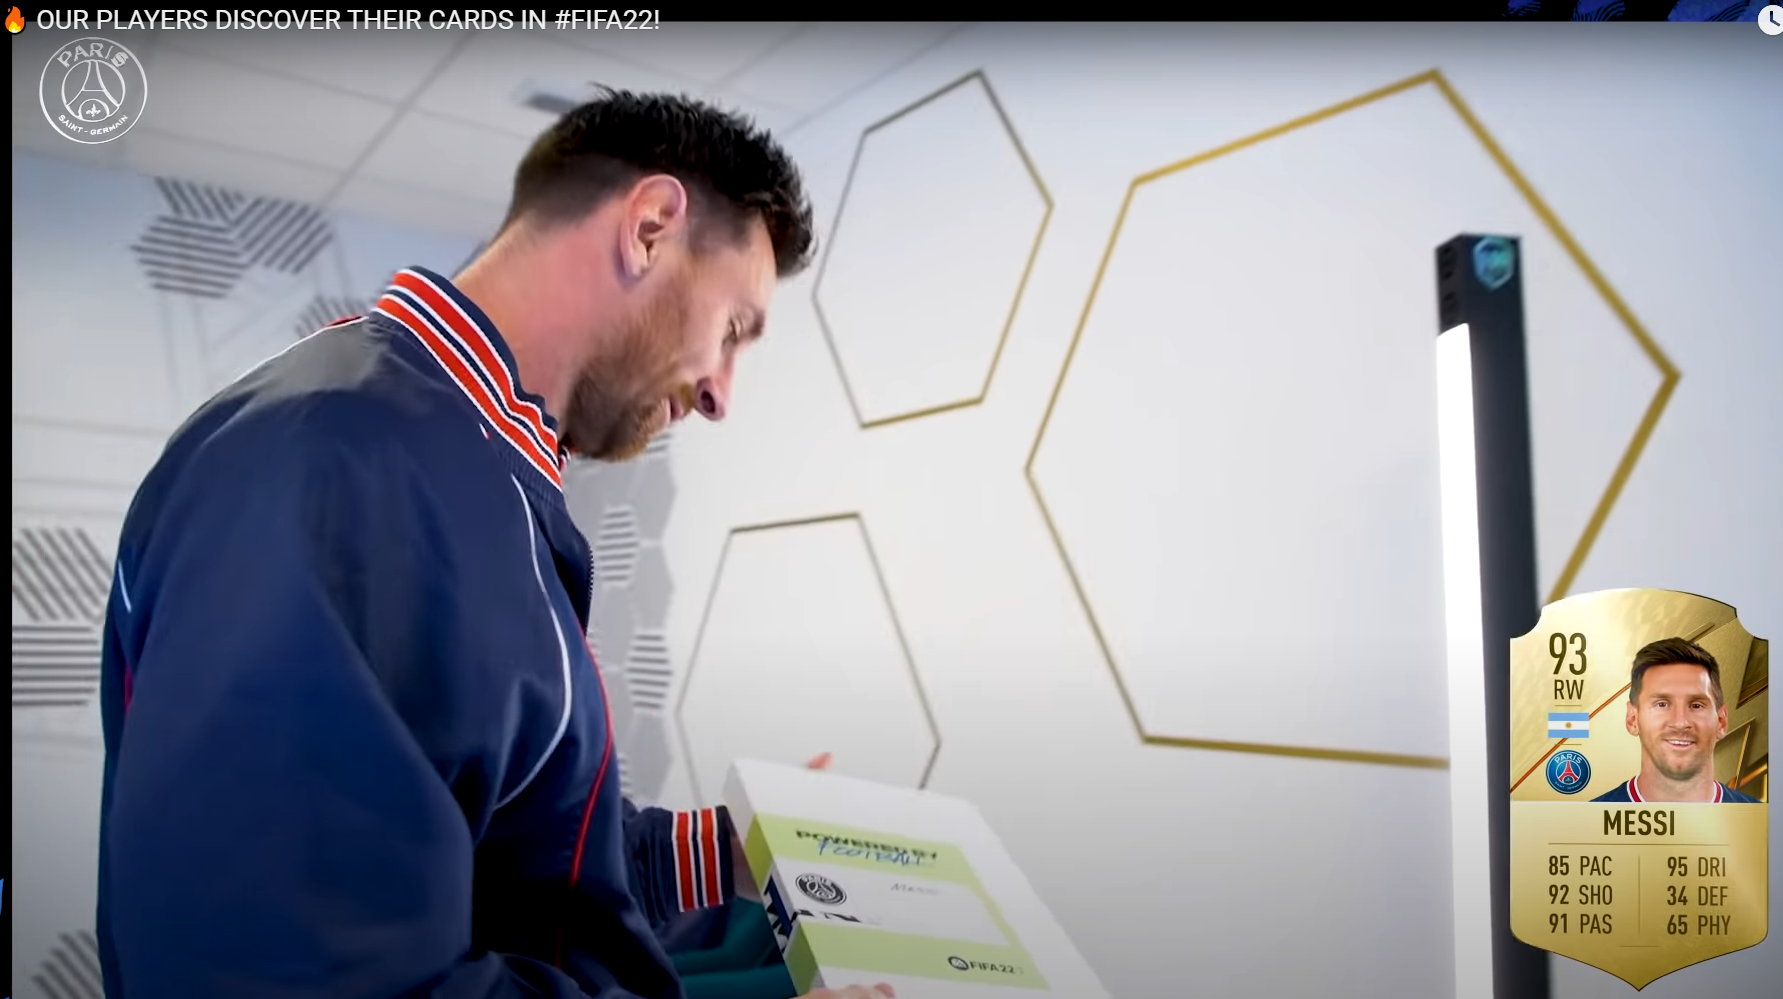

## **Limpieza de datos**
Verificamos y analizamos los datos con los que trabajaremos, limpiando la información para poder trabajar ordenadamente

In [41]:
df['club_logo_url'] = df['club_logo_url'].replace(np.nan,'no_club_logo') #Reemplazamos los valores NaN por la categoría "no_club_logo"
df['club_flag_url'] = df['club_flag_url'].replace(np.nan,'no_club_flag')#Reemplazamos los valores NaN por la categoría "no_club_flag"
df['nation_logo_url'] = df['nation_logo_url'].replace(np.nan,'no_nation_logo') #Reemplazamos los valores NaN por la categoría "no_nation_logo"
df['club_loaned_from'] = df['club_loaned_from'].replace(np.nan,'no_loan')  #Reemplazamos los valores NaN por la categoría "no_loan"
df['club_joined'] = df['club_joined'].replace(np.nan,'no_date') #Reemplazamos los valores NaN por la categoría "no_date", para excluir posteriormente en el análisis, los jugadores sin fecha de inicio en club
df['nation_position'] = df['nation_position'].replace(np.nan,'no_call_up') #Reemplazamos los valores NaN de aquellos jugadores no "convocados" para las selecciones nacionales
df['release_clause_eur'] = df['release_clause_eur'].replace(np.nan,'no_release_clause') #Reemplazamos los valores NaN de aquellos sin cláusula de rescisión
df['player_tags'] = df['player_tags'].replace(np.nan,'#no_tag') #Reemplazamos los valores NaN de aquellos jugadores que no tienen #(tags) asignados
df['player_traits'] = df['player_traits'].replace(np.nan,'no_traits') #Reemplazamos los valores NaN de aquellos jugadores que no tienen "rasgos" asignados
df['lw'] = df['lw'].fillna(df['lf']) # Llenamos los valores Nan de los Wings izquierdos con los valores de su desempeño como delanteros (Los valores pueden variar +2 / -2 para los 324 valores Nan, pero esto no afectará considerablemente la muestra)
df['rw'] = df['rw'].fillna(df['rf']) # Llenamos los valores Nan de los Wings derechos con los valores de su desempeño como delanteros (Los valores pueden variar +2 / -2 para los 324 valores Nan, pero esto no afectará considerablemente la muestra)
df = df.dropna(subset=['value_eur']) ##Dropeamos los valores "Nan", ya que solo 74 jugadores no tienen valor,por lo que no es determinante y puede descartarse"
df = df.drop(columns=['nation_team_id','nation_jersey_number', 'release_clause_eur']) #Dropeamos las columnas que tienen datos de poca utilidad para nuestros fines


In [42]:
#Generamos una nueva columna que 'simplifique' o 'agrupe' las principales posiciones en 4 clasificaciones (Arquero, Defensor, Mediocampista y delantero)
conditions = [
    (df['player_positions'].str.contains('GK')),
    (df['player_positions'].str.contains('CB')),
    (df['player_positions'].str.contains('LB')),
    (df['player_positions'].str.contains('LWB')),
    (df['player_positions'].str.contains('RB')),
    (df['player_positions'].str.contains('RWB')),
    (df['player_positions'].str.contains('CF')),
    (df['player_positions'].str.contains('LW')),  
    (df['player_positions'].str.contains('RW')),
    (df['player_positions'].str.contains('ST')),
    (df['player_positions'].str.contains('CAM')),
    (df['player_positions'].str.contains('CDM')),
    (df['player_positions'].str.contains('CM')),    
    (df['player_positions'].str.contains('LM')),
    (df['player_positions'].str.contains('RM'))
    ]

values = ['Arquero','Defensor','Defensor','Defensor','Defensor','Defensor','Delantero','Delantero','Delantero','Delantero', 'Mediocampista',  'Mediocampista',  'Mediocampista',  'Mediocampista',  'Mediocampista']
df['new_pos']= np.select(conditions, values)
df[['long_name','player_positions','new_pos']] #Checkeamos que quedne correctamente asignadas las posiciones

long_name player_positions        new_pos
0           Lionel Andrés Messi Cuccittini       RW, ST, CF      Delantero
1                       Robert Lewandowski               ST      Delantero
2      Cristiano Ronaldo dos Santos Aveiro           ST, LW      Delantero
3            Neymar da Silva Santos Júnior          LW, CAM      Delantero
4                          Kevin De Bruyne          CM, CAM  Mediocampista
...                                    ...              ...            ...
19234                                  宋德福              CDM  Mediocampista
19235                      Caoimhin Porter               CM  Mediocampista
19236              Nathan Logue-Cunningham               CM  Mediocampista
19237                          Luke Rudden               ST      Delantero
19238              Emanuel Lalchhanchhuaha              CAM  Mediocampista

[19165 rows x 3 columns]

## **Primer obstáculo**
 Tomando como referencia el dato de OVERALL, decidimos trabajar en base al mismo para comenzar con los primeros análisis, pero ni bien arrancamos, nos topamos con el primer inconveniente. Encontramos que teníamos muchos valores faltantes en el dataset. 

In [43]:
print(df.shape) #Checkeamos que no hayan duplicados
df= df.drop_duplicates()
print(df.shape)

(19165, 108)
(19165, 108)


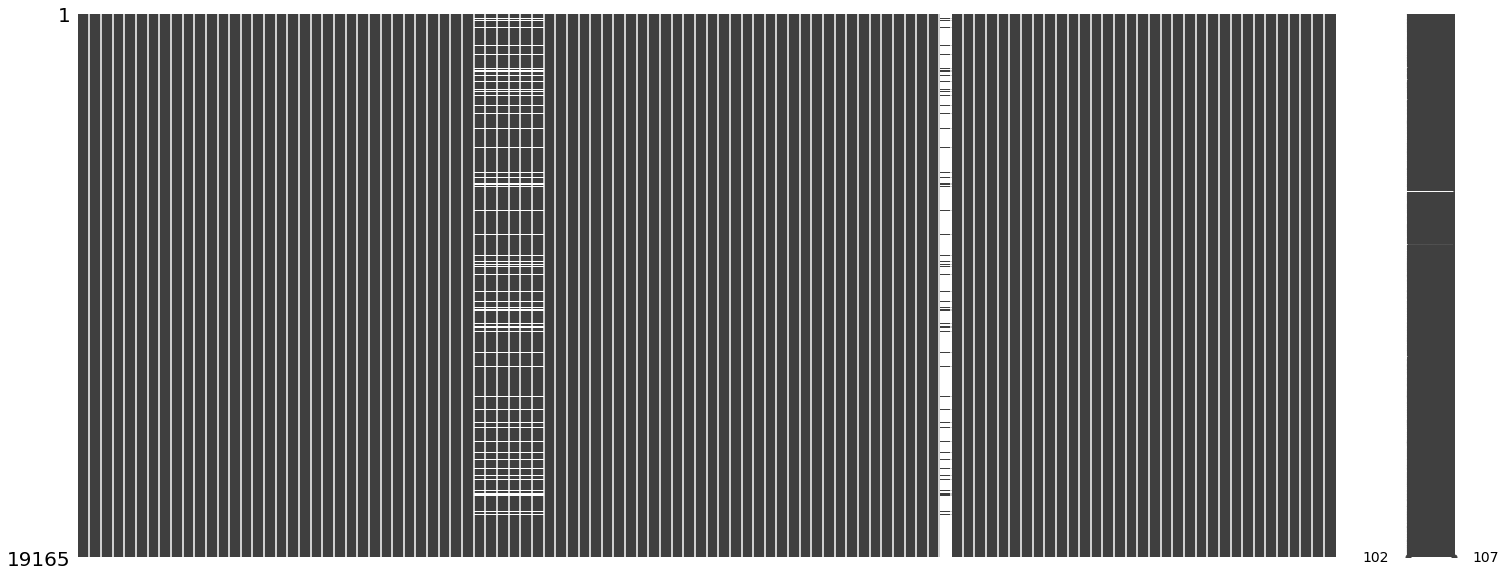

In [44]:
#Importamos la librería misigno y checkeamos si luego de las modificaciones nos quedaron valores nulos
import missingno as msno
msno.matrix(df)

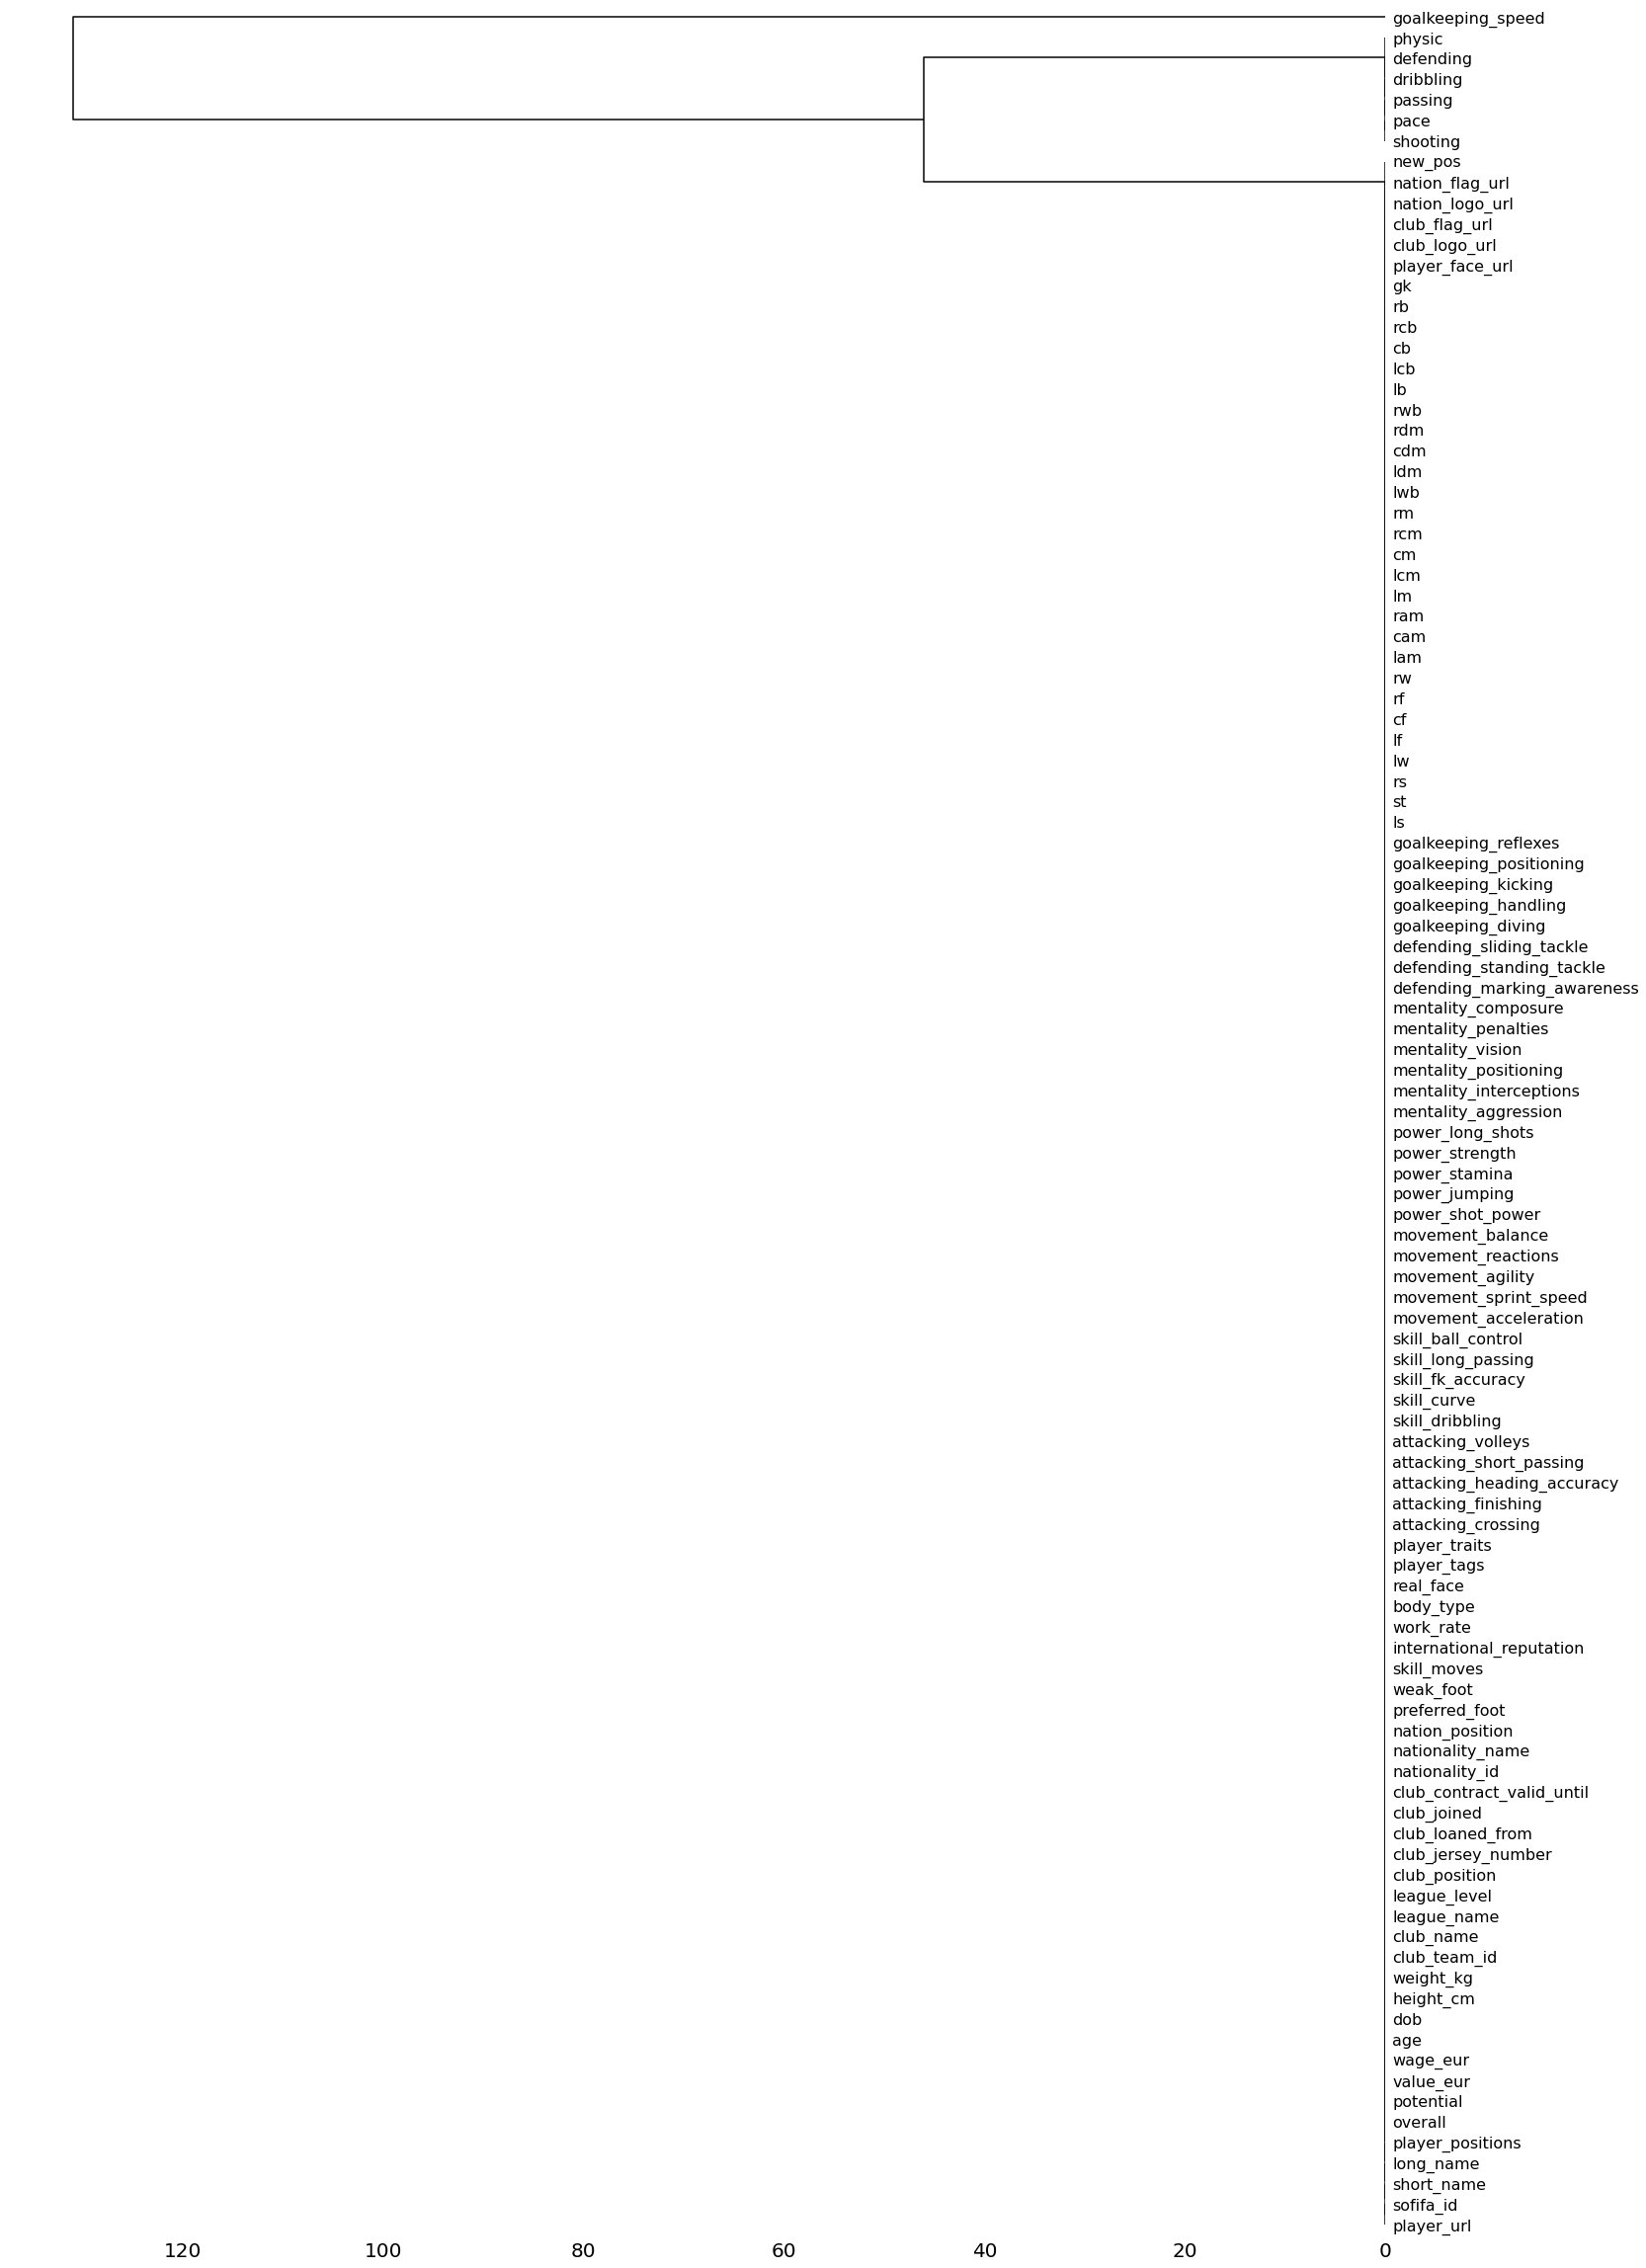

In [45]:
msno.dendrogram(df)

**Al mirar con mayor detenimiento, detectamos que habían habilidades que solo tenían los jugadores y no los arqueros y viceversa. No podíamos quitar todos estos datos, ya que nos quedaríamos sin Jugadores, o sin Arqueros... Luego de pensar un rato, pudimos encontrar una alternativa viable para poder conservar toda nuestra nómina!
 Avanzaríamos con la división de ambos datasets, para poder trabajarlos por separado, sin perder datos ni habilidades**

In [46]:
df_g = df[df['player_positions']=='GK'].copy() 
df_p = df[df['player_positions']!='GK'].copy() 
df_g = df_g.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='') ## Reiniciamos andos índices para que queden acordes a las filas
df_p = df_p.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
df_g = df_g.drop(columns=['index','pace','shooting','passing','dribbling','defending','physic']) # Dropeamos las columnas que no tienen "Skills" para los arqueros
df_p = df_p.drop(columns=['index','goalkeeping_speed']) #Dropeamos la única columna que no tiene skills para jugadores de cancha


In [47]:
df_p

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
17036     261962  https://sofifa.com/player/261962/defu-song/220002   
17037     262040  https://sofifa.com/player/262040/caoimhin-port...   
17038     262760  https://sofifa.com/player/262760/nathan-logue/...   
17039     262820  https://sofifa.com/player/262820/luke-rudden/2...   
17040     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
17036           Song Defu                                  宋德福   
17037           C. Porter                      Caoimhin Porter   
17038            N. Logue              Nathan Logue-Cunningham   
17039           L. Rudden                          Luke Rudden   
17040  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
17036              CDM       47         52      70000.0    1000.0   22  ...   
17037               CM       47         59     110000.0     500.0   19  ...   
17038               CM       47         55     100000.0     500.0   21  ...   
17039               ST       47         60     110000.0     500.0   19  ...   
17040              CAM       47         60     110000.0     500.0   19  ...   

         cb   rcb    rb    gk  \
0      50+3  50+3  61+3  19+3   
1      60+3  60+3  61+3  19+3   
2      53+3  53+3  60+3  20+3   
3      50+3  50+3  62+3  20+3   
4      69+3  69+3  75+3  21+3   
...     ...   ...   ...   ...   
17036  46+2  46+2  48+2  15+2   
17037  44+2  44+2  48+2  14+2   
17038  45+2  45+2  47+2  12+2   
17039  26+2  26+2  32+2  15+2   
17040  41+2  41+2  45+2  16+2   

                                         player_face_url  \
0      https://cdn.sofifa.net/players/158/023/22_120.png   
1      https://cdn.sofifa.net/players/188/545/22_120.png   
2      https://cdn.sofifa.net/players/020/801/22_120.png   
3      https://cdn.sofifa.net/players/190/871/22_120.png   
4      https://cdn.sofifa.net/players/192/985/22_120.png   
...                                                  ...   
17036  https://cdn.sofifa.net/players/261/962/22_120.png   
17037  https://cdn.sofifa.net/players/262/040/22_120.png   
17038  https://cdn.sofifa.net/players/262/760/22_120.png   
17039  https://cdn.sofifa.net/players/262/820/22_120.png   
17040  https://cdn.sofifa.net/players/264/540/22_120.png   

                                    club_logo_url  \
0          https://cdn.sofifa.net/teams/73/60.png   
1          https://cdn.sofifa.net/teams/21/60.png   
2          https://cdn.sofifa.net/teams/11/60.png   
3          https://cdn.sofifa.net/teams/73/60.png   
4          https://cdn.sofifa

In [48]:
df_g

sofifa_id                                         player_url  \
0        200389  https://sofifa.com/player/200389/jan-oblak/220002   
1        167495  https://sofifa.com/player/167495/manuel-neuer/...   
2        192448  https://sofifa.com/player/192448/marc-andre-te...   
3        192119  https://sofifa.com/player/192119/thibaut-court...   
4        210257  https://sofifa.com/player/210257/ederson-santa...   
...         ...                                                ...   
2119     261958  https://sofifa.com/player/261958/xiang-gao/220002   
2120     263340  https://sofifa.com/player/263340/harvey-wiles-...   
2121     259213  https://sofifa.com/player/259213/dylan-da-silv...   
2122     259646  https://sofifa.com/player/259646/arsh-shaikh/2...   
2123     261547  https://sofifa.com/player/261547/revanth-by/22...   

             short_name                  long_name player_positions  overall  \
0              J. Oblak                  Jan Oblak               GK       91   
1              M. Neuer         Manuel Peter Neuer               GK       90   
2         M. ter Stegen      Marc-André ter Stegen               GK       90   
3           T. Courtois           Thibaut Courtois               GK       89   
4               Ederson  Ederson Santana de Moraes               GK       89   
...                 ...                        ...              ...      ...   
2119          Gao Xiang                         高翔               GK       48   
2120  H. Wiles-Richards      Harvey Wiles-Richards               GK       48   
2121        D. Da Silva             Dylan Da Silva               GK       47   
2122          A. Shaikh                Arsh Shaikh               GK       47   
2123              R. By                 Revanth By               GK       47   

      potential    value_eur  wage_eur  age  ...    cb   rcb    rb    gk  \
0            93  112000000.0  130000.0   28  ...  33+3  33+3  32+3  89+3   
1            90   13500000.0   86000.0   35  ...  34+3  34+3  35+3  88+2   
2            92   99000000.0  250000.0   29  ...  33+3  33+3  31+3  88+3   
3            91   85500000.0  250000.0   29  ...  29+3  29+3  29+3  86+3   
4            91   94000000.0  200000.0   27  ...  35+3  35+3  36+3  87+3   
...         ...          ...       ...  ...  ...   ...   ...   ...   ...   
2119         54      60000.0     800.0   20  ...  21+2  21+2  17+2  47+2   
2120         65     110000.0    1000.0   19  ...  20+2  20+2  19+2  47+2   
2121         55      90000.0     500.0   21  ...  19+2  19+2  18+2  46+2   
2122         67     110000.0     500.0   18  ...  17+2  17+2  16+2  46+2   
2123         55      90000.0     500.0   22  ...  19+2  19+2  16+2  46+2   

                                        player_face_url  \
0     https://cdn.sofifa.net/players/200/389/22_120.png   
1     https://cdn.sofifa.net/players/167/495/22_120.png   
2     https://cdn.sofifa.net/players/192/448/22_120.png   
3     https://cdn.sofifa.net/players/192/119/22_120.png   
4     https://cdn.sofifa.net/players/210/257/22_120.png   
...                                                 ...   
2119  https://cdn.sofifa.net/players/261/958/22_120.png   
2120  https://cdn.sofifa.net/players/263/340/22_120.png   
2121  https://cdn.sofifa.net/players/259/213/22_120.png   
2122  https://cdn.sofifa.net/players/259/646/22_120.png   
2123  https://cdn.sofifa.net/players/261/547/22_120.png   

                                   club_logo_url  \
0        https://cdn.sofifa.net/teams/240/60.png   
1         https://cdn.sofifa.net/teams/21/60.png   
2        https://cdn.sofifa.net/teams/241/60.png   
3        https://cdn.sofifa.net/teams/243/60.png   
4         https://cdn.sofifa.net/teams/10/60.png   
...                                          ...   
2119  https://cdn.sofifa.net/teams/112541/60.png   
2120    https://cdn.sofifa.net/teams/1919/60.png   
2121  https://cdn.sofifa.net/teams/113298/60.png   
2122  https://cdn.sofifa.net/teams/113146/60.png   
2123  http

**Ya no había más duplicados!**

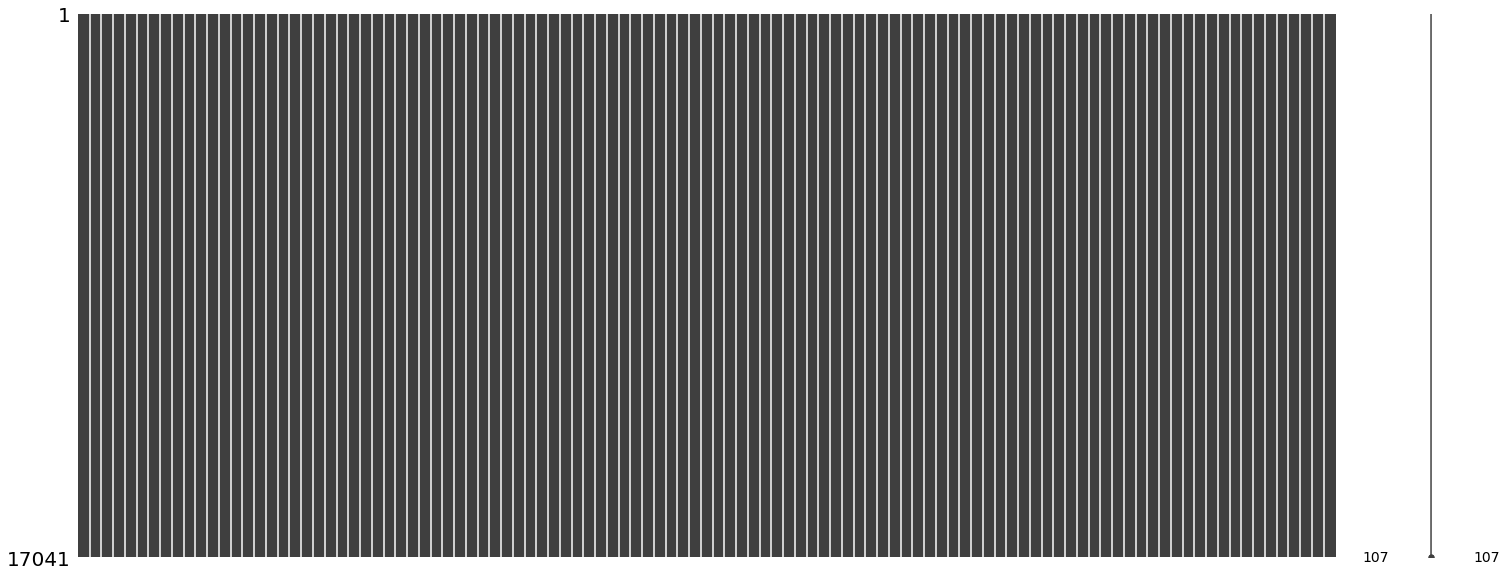

In [49]:
msno.matrix(df_p) #Checkeamos que el nuevo dataset generado no tenga duplicados

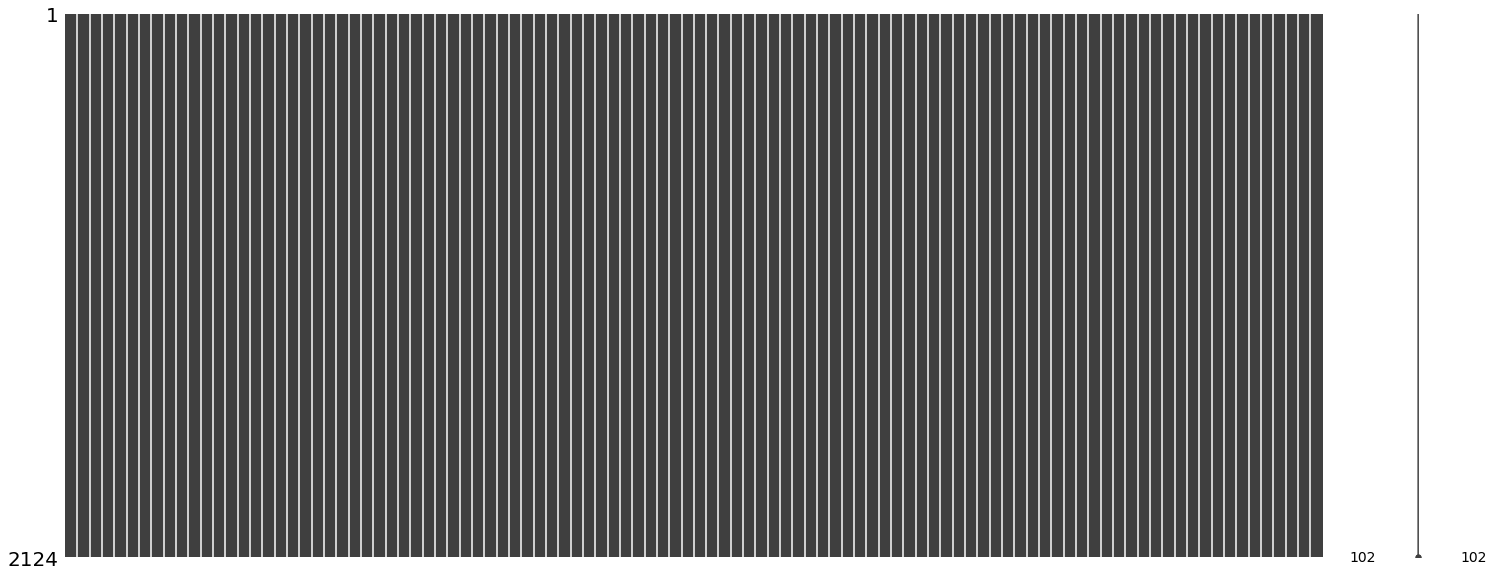

In [50]:
msno.matrix(df_g) #Checkeamos que el nuevo dataset generado no tenga duplicados

## **¿Salarios virtuales?**
Esto nos dió el pie para poder comenzar a realizar comparativas, tomando como referencia el dato de OVERALL como habilidad que mejor resume las características de los jugadores.
 Decidimos comparar y analizar si realmente el salario asignado a los jugadores dentro del FIFA 22, tenía una relación con este skill

Text(0, 0.5, 'Sueldo Jugador')

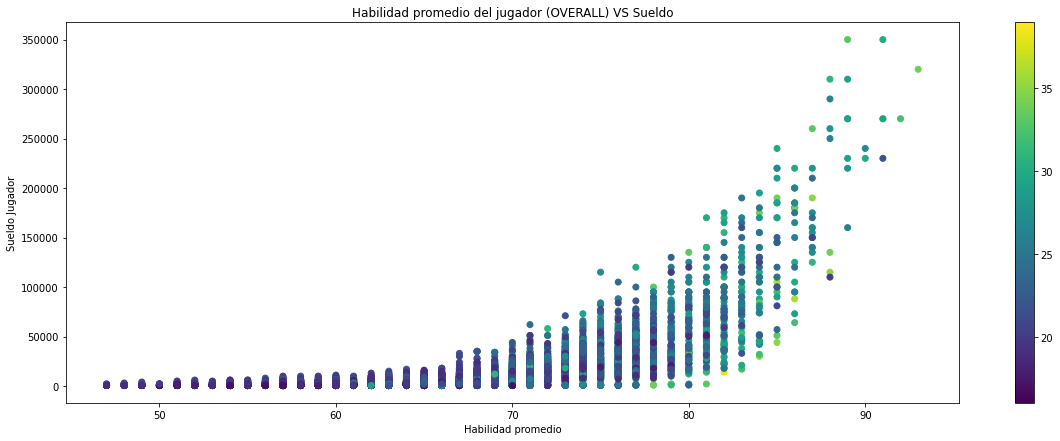

In [51]:
fig , ax = plt.subplots(figsize= (20,7))
mapeo_colores = ax.scatter(df_p['overall'], df_p['wage_eur'], c=df_p.age)
fig.colorbar(mapeo_colores)
ax.set_title('Habilidad promedio del jugador (OVERALL) VS Sueldo')
ax.set_xlabel('Habilidad promedio')
ax.set_ylabel('Sueldo Jugador')
## En base a los 2 gráficos siguientes, contrastamos la compartación de sueldos que se pagan según habilidades "overall" determinadas en FIFA22. El overall está compuesto por la siguientes habilidades
## velocidad, tiro, pase, defensa, dribleo potencia física.

Text(0, 0.5, 'Sueldo Arquero')

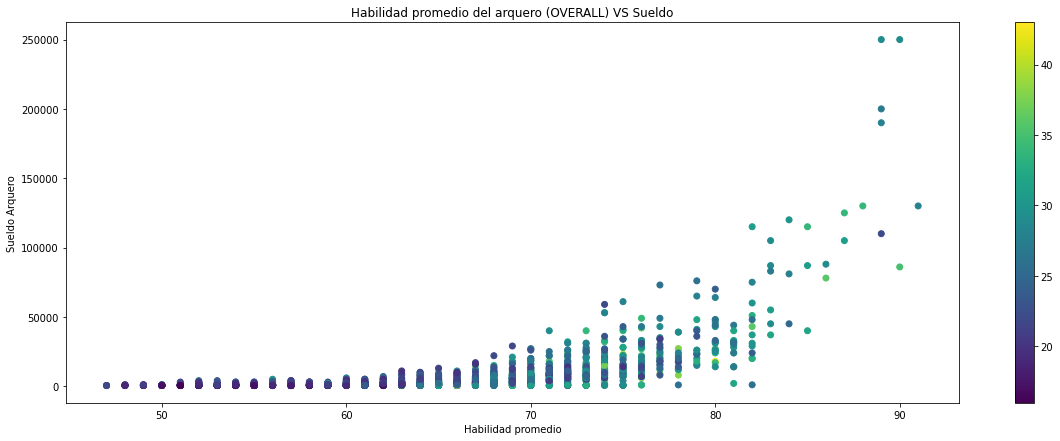

In [52]:
fig , ax = plt.subplots(figsize= (20,7))
mapeo_colores = ax.scatter(df_g['overall'], df_g['wage_eur'], c=df_g.age)
fig.colorbar(mapeo_colores)
ax.set_title('Habilidad promedio del arquero (OVERALL) VS Sueldo')
ax.set_xlabel('Habilidad promedio')
ax.set_ylabel('Sueldo Arquero')

Luego de estas verificaciones, concluimos que el salario de cada jugador está alineado al nivel de habilidades que posee y tomando los gráficos realizados, podemos inferir esta relación es directa

## ¿Cuales son las ligas mas trascendentales?

**Analizando las nóminas, podemos observar que los países mas trascendentales o con mayor presencia dentro del FIFA, están alineados a aquellos países del mundo real, donde están presentes las ligas mas competetitivas.
 Para checkear esto, preesentamos un gráfico dividido por Jugadores y Arqueros, indicando cuales son los países que mayor cantidad de jugadores tienen bajo su nacionalidad**

In [53]:
#Preparación de la información a utilizar en los gráficos
n_p_nationality =df_p[['nationality_name','long_name']].groupby(by=['nationality_name']).count().reset_index()
n_p_nationality['cantidad'] = n_p_nationality['long_name']
n_p_nationality = n_p_nationality.drop(columns=['long_name'])
n_g_nationality =df_g[['nationality_name','long_name']].groupby(by=['nationality_name']).count().reset_index()
n_g_nationality['cantidad'] = n_g_nationality['long_name']
n_g_nationality = n_g_nationality.drop(columns=['long_name'])


[Text(0.5, 1.0, 'Top 10 de Países con mayor cantidad de jugadores')]

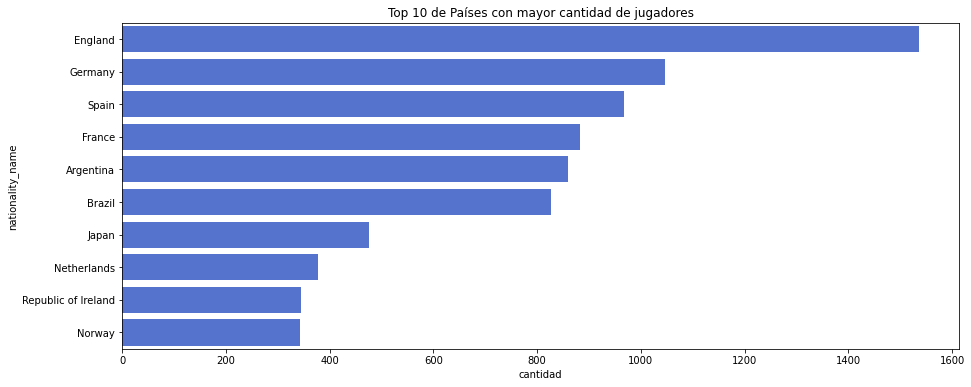

In [54]:
plt.figure(figsize=(15,6))
sns.barplot( data=n_p_nationality.sort_values('cantidad', ascending=False).head(10), x='cantidad', y='nationality_name', color = "royalblue").set(title='Top 10 de Países con mayor cantidad de jugadores')

[Text(0.5, 1.0, 'Top 10 de Países con mayor cantidad de arqueros')]

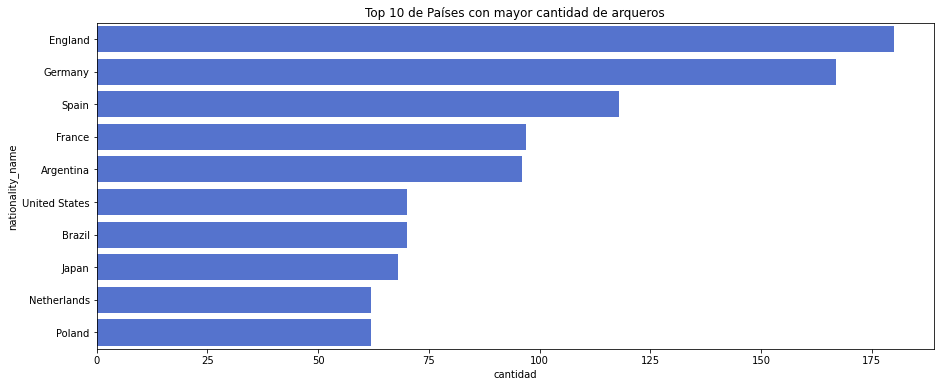

In [55]:
plt.figure(figsize=(15,6))
sns.barplot( data=n_g_nationality.sort_values('cantidad', ascending=False).head(10), x='cantidad', y='nationality_name', color = "royalblue").set(title='Top 10 de Países con mayor cantidad de arqueros')

## ¿Quienes ganan mas?

**Esto nos lleva a nuestro siguiente interrogante... Entre jugadores y arqueros, en general, quiénes ganan mas dentro del FIFA?.**

[Text(0.5, 1.0, 'Comparativa de sueldos entre Jugadores de cancha y Arqueros')]

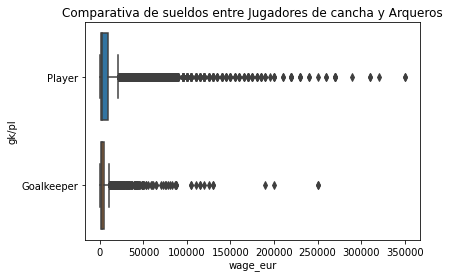

In [56]:
df['gk/pl']= np.where(df['player_positions']=='GK','Goalkeeper','Player') #Agrego una columna que tiene el valor "Player o Goalkeeper"
sns.boxplot(x="wage_eur", y='gk/pl', data=df).set(title='Comparativa de sueldos entre Jugadores de cancha y Arqueros') # Intentando verificar si los jugadores de cancha, cobran mas que los jugadores arqueros, al interpretar el siguiente gráfico, nos topamos con la siguiente situación-
## Solamente el 3,11% de los jugadores del Dataset, cobra mas de 50.000 Euros. No obstante, vemos que en lineas generales, el salario de jugadores de cancha, está por encima del de los arqueros


**Claramente observamos que los jugadores de cancha, están mejor pagos que los arqueros, pero que sucedería si removemos de nuestro gráfico, a los jugadores "estrella" que quedan muy lejos del promedio de los sueldos?**

[Text(0.5, 1.0, 'Comparativa de sueldos entre el jugadores con un sueldo "estandar" y arqueros con un sueldo "estándar"')]

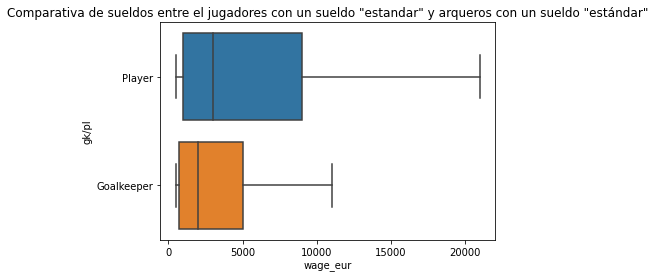

In [57]:
df['gk/pl']= np.where(df['player_positions']=='GK','Goalkeeper','Player') #Agrego una columna que tiene el valor "Player o Goalkeeper"
sns.boxplot(x="wage_eur", y='gk/pl', data=df, showfliers = False).set(title='Comparativa de sueldos entre el jugadores con un sueldo "estandar" y arqueros con un sueldo "estándar"')

**Finalmente llegamos a la conclusión que aún tomando a aquellos jugadores que mas ganan, como así también, a los que ganan un salario promedio, estarán en líneas generales, por encima de los salarios de los arqueros**

## ¿Que papel juega el pié habil en esto?

Ya sabemos que los jugadores de cancha ganan mas que los arqueros... pero hay alguna relación entre el pié hábil del jugador y su talento/salario?
 Observamos que siguiendo en línea con estadísticas biométricas que indican lo siguiente:

 **En el mayor estudio mundial, dirigido por la Universidad Nacional y Kapodistríaca de Atenas (Grecia) y por la Universidad de St Andrews (Reino Unido), se ha llegado a la conclusión de que el 10,6% de la población mundial es zurda, un dato que, hasta la fecha, era estimado.**

No obstante, observamos que esta no es la tendencia entre los futbolistas, puesto que analizando los pies hábiles de cada uno de los jugadores de cancha, tienen una proporción de aproximadamente 1 a 3, es decir que aproximadamente el 25% de los jugadores de cancha de nuestro dataset, es zurdo

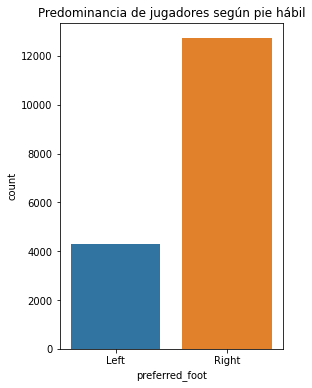

In [58]:
plt.figure(figsize=(4,6)) 
plt.title("Predominancia de jugadores según pie hábil")
sns.countplot(x='preferred_foot', data=df_p) #Para checkear nuestra hipótesis respecto de la predominancia de los pies hábiles, podemos identificar que en líneas generales,
# los jugadores que han llegado a un nivel profesional son en su mayor medida diestros, con una proporción 3 a 1, predominnado los diestros por sobre los zurdos

**Analizando comparativamente salarios, pies hábiles y habilidad, podemos arribar a la conclusión que en prorporción, no hay un determinante en cuanto a pié hábil para tener un mejor / peor sueldo / overall**

Text(0.5, 1.0, 'Distribución de jugadores según pie hábil/salario/habilidad')

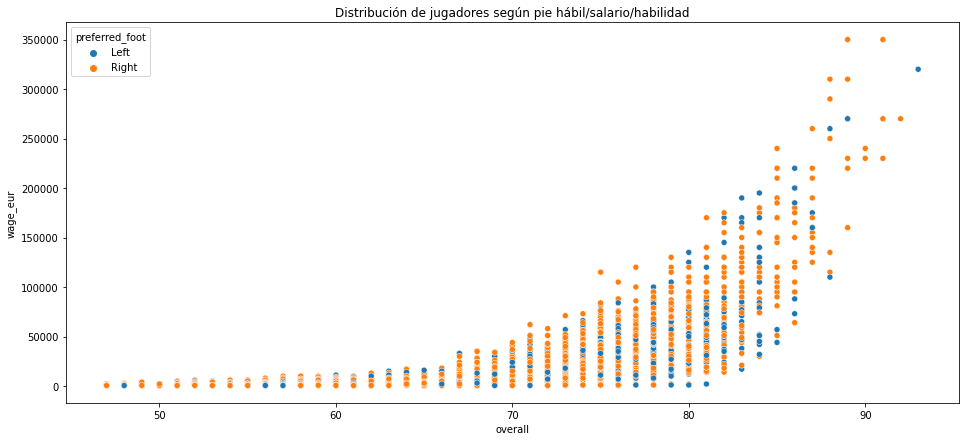

In [59]:
plt.figure(figsize=(16,7))
sns.scatterplot(data=df_p, x="overall", y="wage_eur", hue='preferred_foot')
plt.title("Distribución de jugadores según pie hábil/salario/habilidad")
 #En base a la distribución con el "overall", inferimos que en proporción son mas los diestros exitosos que los zurdos. 

##Separando la nómina en "Clusters"

**Finalizados los primeros análisis, también queremos identificar grupos o clusters de jugadores relacionados en base a distintos atributos. Para esto, generamos la visualización de un 3 grupos para dividir a los jugadores según su "Habilidad" y "Salario"**

##Cálculo de clusters

In [60]:
def normalize(df):
  result = df.copy()

  for x in df.columns:
    max_val = df[x].max()
    min_val = df[x].min()
    result[x] = (df[x] - min_val) / (max_val - min_val)

    return result

df_g_norm = normalize(df_g[['age']])
df_p_norm = normalize(df_p[['age']])
df_g_norm['overall'] = normalize(df_g[['overall']])
df_p_norm['overall'] = normalize(df_p[['overall']])
df_g_norm['wage_eur'] = normalize(df_g[['wage_eur']])
df_p_norm['wage_eur'] = normalize(df_p[['wage_eur']])
k = 3 # Definir los grupos 
kmeans_g = KMeans(n_clusters=k, init='k-means++')
kmeans_g.fit(df_g_norm)

labels_g = kmeans_g.predict(df_g_norm)
centroids_g = kmeans_g.cluster_centers_
centroids_g

array([[0.36192242, 0.49235049, 0.03832059],
       [0.19116488, 0.23572079, 0.00272184],
       [0.64075296, 0.49073657, 0.03312467]])

In [61]:
k = 3 # Definir los grupos 
kmeans_p = KMeans(n_clusters=k, init='k-means++')
kmeans_p.fit(df_p_norm)

labels_p = kmeans_p.predict(df_p_norm)
centroids_p = kmeans_p.cluster_centers_
centroids_p

array([[0.63927395, 0.47975411, 0.03542453],
       [0.19118976, 0.26593315, 0.00405612],
       [0.36439827, 0.47810491, 0.03496986]])

##Clusters de Habilidad / Salario

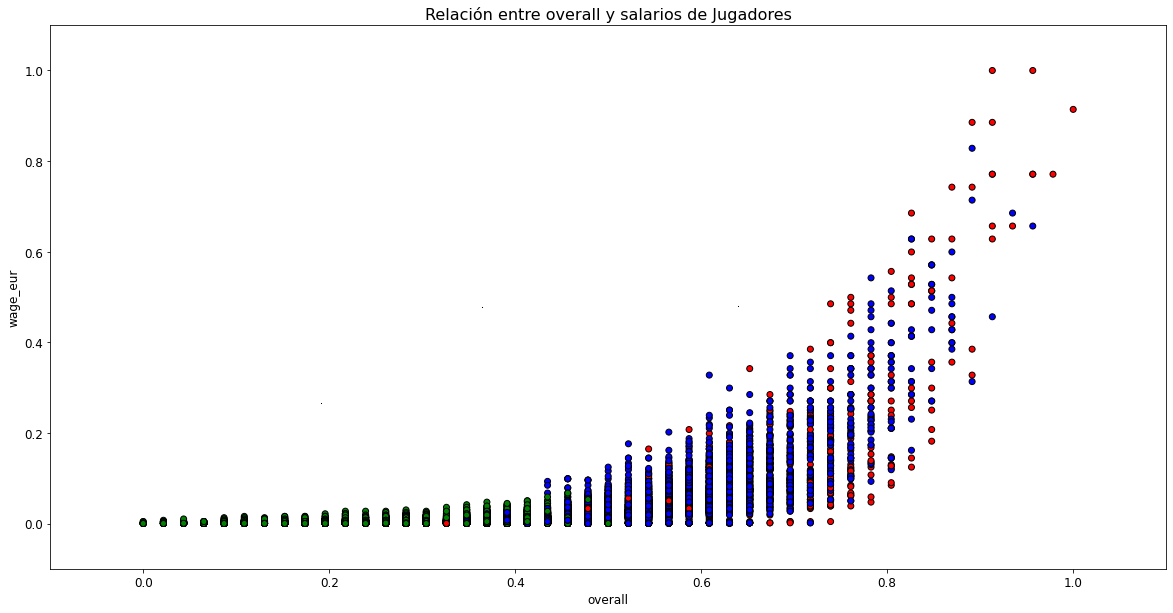

In [62]:
plt.figure(figsize=(20, 10))
color_map = {1:'r', 2:'g', 3:'b'}
colors = [color_map[x+1] for x in labels_p]

plt.scatter(df_p_norm['overall'], df_p_norm['wage_eur'], color=colors, alpha=1, edgecolor='k')
for idx, centroid in enumerate(centroids_p):
    plt.scatter(*centroid, marker='*', edgecolor='k')
plt.xlim(-0.1, 1.1)
plt.xlabel('overall', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-0.1, 1.1)
plt.ylabel('wage_eur', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación entre overall y salarios de Jugadores', fontsize=16)
plt.show()

In [63]:
##Creamos una nueva variable para no sobrecargar la variable empleada anteriormente
df_p_norm_peso = normalize(df_p[['movement_sprint_speed']])
df_p_norm_peso['weight_kg'] = normalize(df_p[['weight_kg']])

In [64]:
#Para un nuevo análisis, recurrimos al esquema del método del codo, para saber cuantos Clusters es aconsejable tomar
sum_sq_d = []
K = range(1,11)
print(K)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_p_norm_peso[['movement_sprint_speed', 'weight_kg']])
    sum_sq_d.append(km.inertia_)
print(sum_sq_d)  

range(1, 11)
[641.4490640084091, 360.09753787076323, 267.1935686462586, 200.44609058245277, 170.45711904302686, 146.28325424138256, 127.14198257878637, 110.47989796543092, 98.51262161336928, 89.3688108864053]


## Determinación de cantidad de clusters
Para nuestro segundo análisis de clusters, determinamos primero utilziando el "método de codo" un cantidad acorde de divisiones para la nómina que tenemos

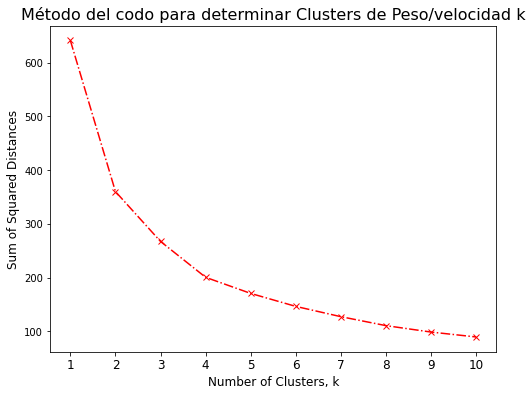

In [65]:
plt.figure(figsize=(8,6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)
plt.title('Método del codo para determinar Clusters de Peso/velocidad k', fontsize=16)
plt.show()

In [66]:
k = 5 # Definir los grupos 
kmeans_peso = KMeans(n_clusters=k, init='k-means++')
kmeans_peso.fit(df_p_norm_peso)

labels_peso = kmeans_peso.predict(df_p_norm_peso)
centroids_peso = kmeans_peso.cluster_centers_
centroids_peso

array([[0.61439636, 0.3160217 ],
       [0.60786418, 0.51178228],
       [0.27652182, 0.53731931],
       [0.78449102, 0.37288711],
       [0.45688926, 0.40180102]])

## Clusters por velocidad / peso
**Finalmente, generamos una nueva agrupación para dividir a los jugadores en grupos su velocidad y peso**

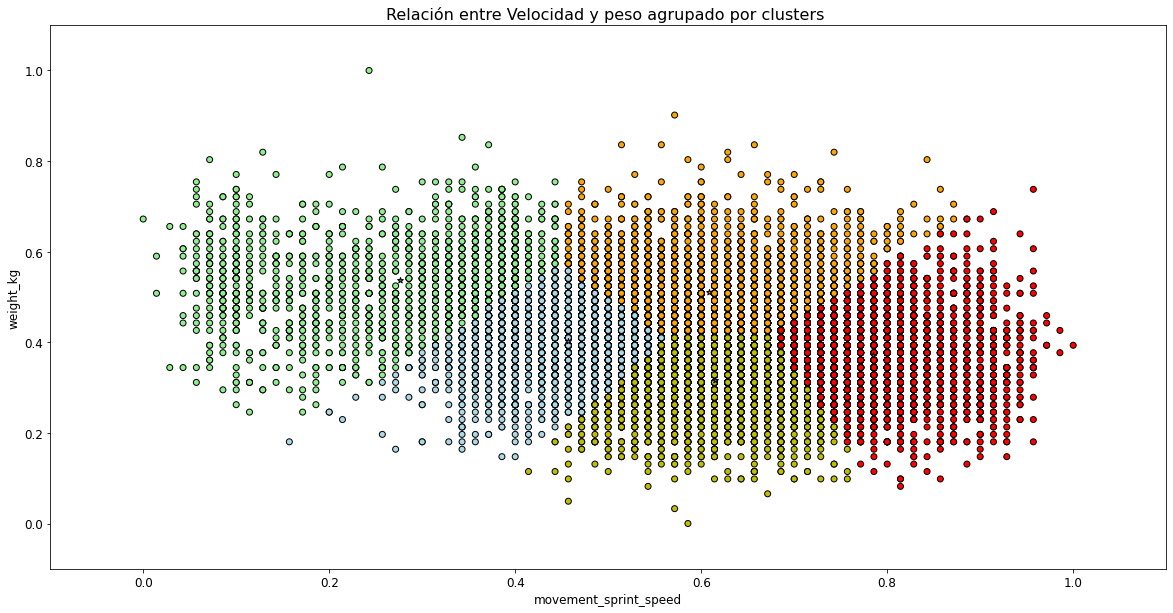

In [67]:
plt.figure(figsize=(20, 10))
color_map = {1:'y', 2:'orange', 3:'lightgreen', 4:'r', 5:'lightblue'}
colors = [color_map[x+1] for x in labels_peso]

plt.scatter(df_p_norm_peso['movement_sprint_speed'], df_p_norm_peso['weight_kg'], color=colors, alpha=1, edgecolor='k')
for idx, centroid in enumerate(centroids_peso):
    plt.scatter(*centroid, marker='*', edgecolor='k')
plt.xlim(-0.1, 1.1)
plt.xlabel('movement_sprint_speed', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-0.1, 1.1)
plt.ylabel('weight_kg', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación entre Velocidad y peso agrupado por clusters ', fontsize=16)
plt.show()

**Interpretando este último gráfico, tenemos los siguientes Clusters:**
- 1° Sección (Izquierda): Los jugadores con mayor peso y menor velocidad
- 2° Sección (Centro izquierda): Los jugadores con menor peso y menor velocidad
- 3° Sección (Centro Superior): Los jugadores con pesados pero con una velocidad media
- 4° Sección (Centro inferior): Los jugadores con menor peso y velocidad media
- 5° Sección (Derecha): Los jugadores con mayor velocidad y en su mayoria con menor peso

## Avanzando con nuestro modelo de regresión
Para poder avanzar con nuestro modelo de regresión. Tomamos una **feature** como objetivo, para generar el modelo predictivo. La Misma será el "**Overall**", que es una variable que recibe influencia de todas las habilidades de los jugadores, sumado a algunas **variables categóricas** como ser, la **posición** en la que juega y el **pié hábil**. Por lo que avanzaremos con un umbral sobre la variable Overall, donde definiremos un valor a partir del cual, podremos considerar a un jugador "Estrella" vs. un jugador "Regular" .

In [68]:
print('Cantidad de datos DF Arqueros', df_g.shape) #Como primera instancia trabajaremos con la cantidad de features que tenemos, para reducir la dimensionalidad
print('Cantidad de datos DF Jugadores', df_p.shape)

Cantidad de datos DF Arqueros (2124, 102)
Cantidad de datos DF Jugadores (17041, 107)


## Limpieza de features
Echamos un vistazo rápido a las variables de los Jugadores (Rojo) VS los Arqueros (Azul) Para identificar cuales podemos eliminar para reducir la cantidad de features, dejando aquellas que sean mas útiles para nuestro análisis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10109f60d0>,
      dtype=object)

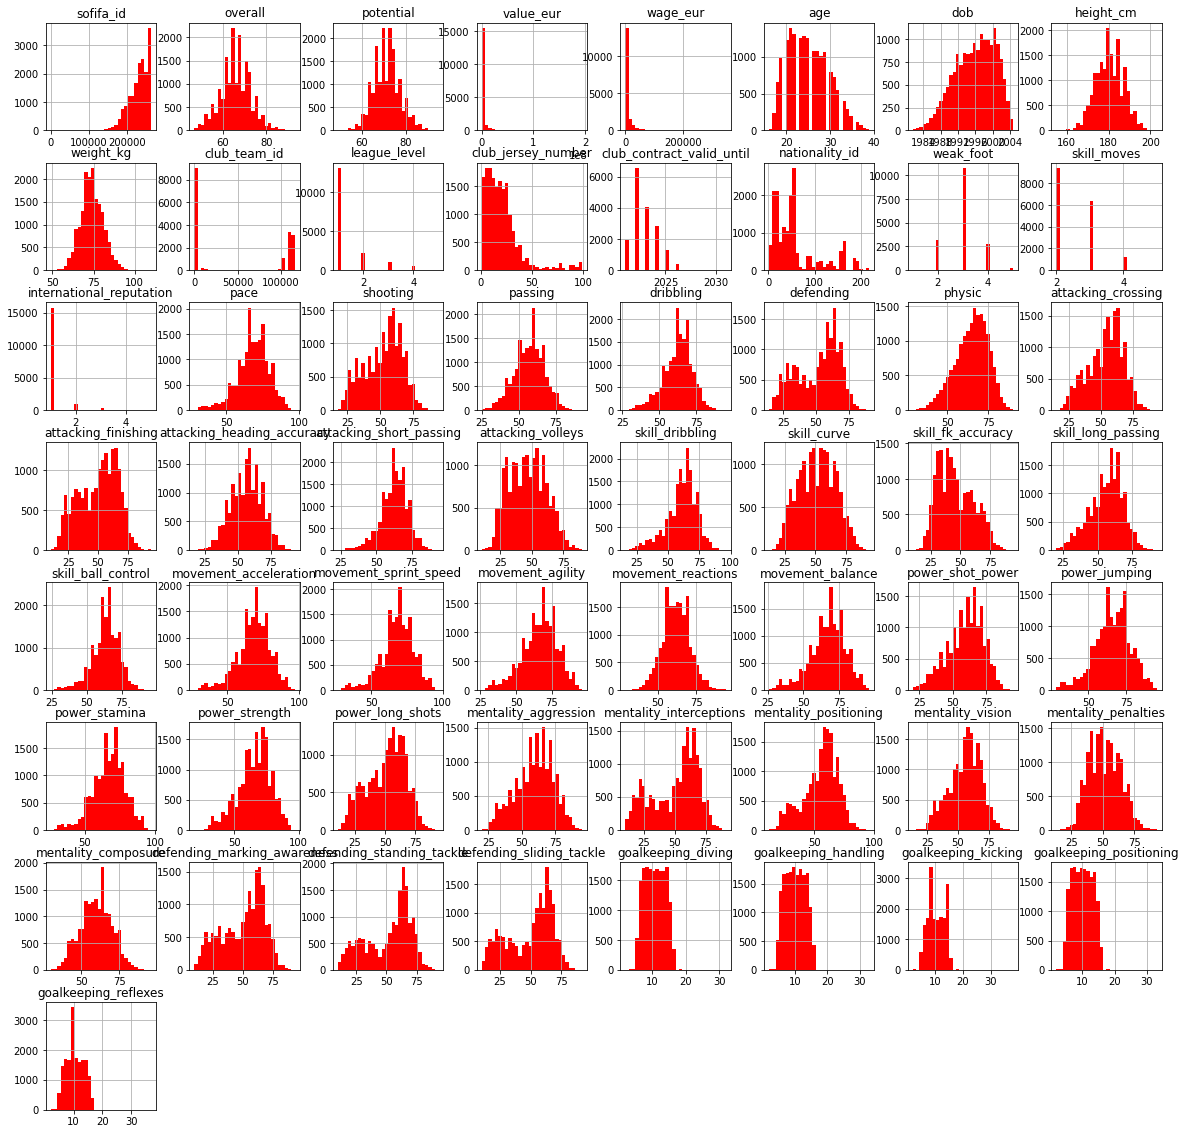

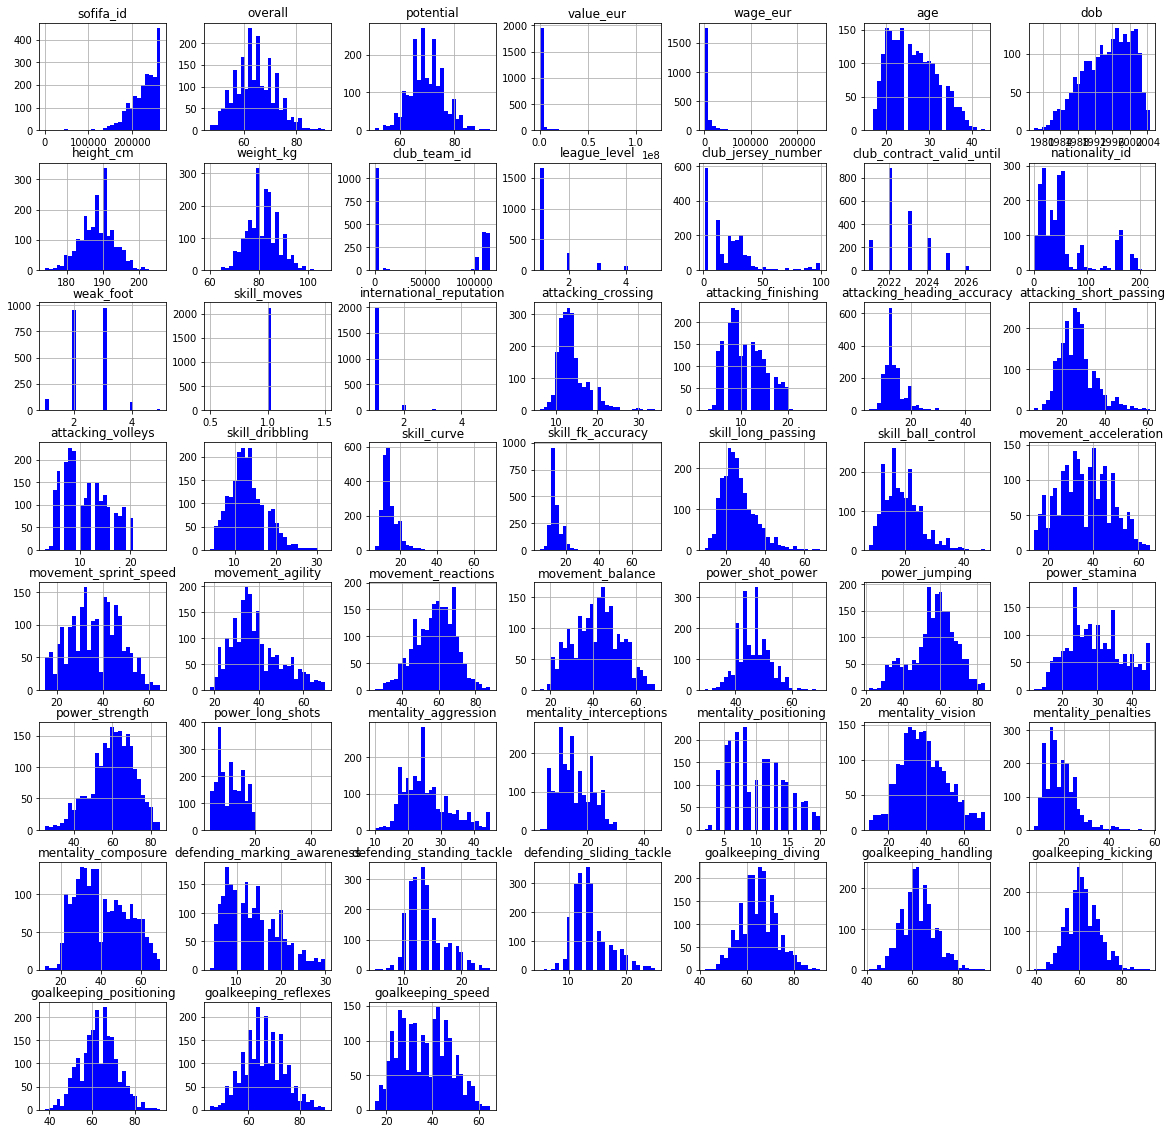

In [69]:
 # Echamos un vistazo rápido a las variables de los Jugadores (Rojo) VS los Arqueros (Azul) Para identificar cuales podemos eliminar para reducir la cantidad de features, dejando aquellas que sean mas útiles para nuestro análisis
df_p.hist(bins=30, figsize=(20,20), color = 'r')
df_g.hist(bins=30, figsize=(20,20), color = 'b')

Cantidad de datos DF Arqueros (2124, 50)
Cantidad de datos DF Jugadores (17041, 55)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f100e48e210>,
      dtype=object)

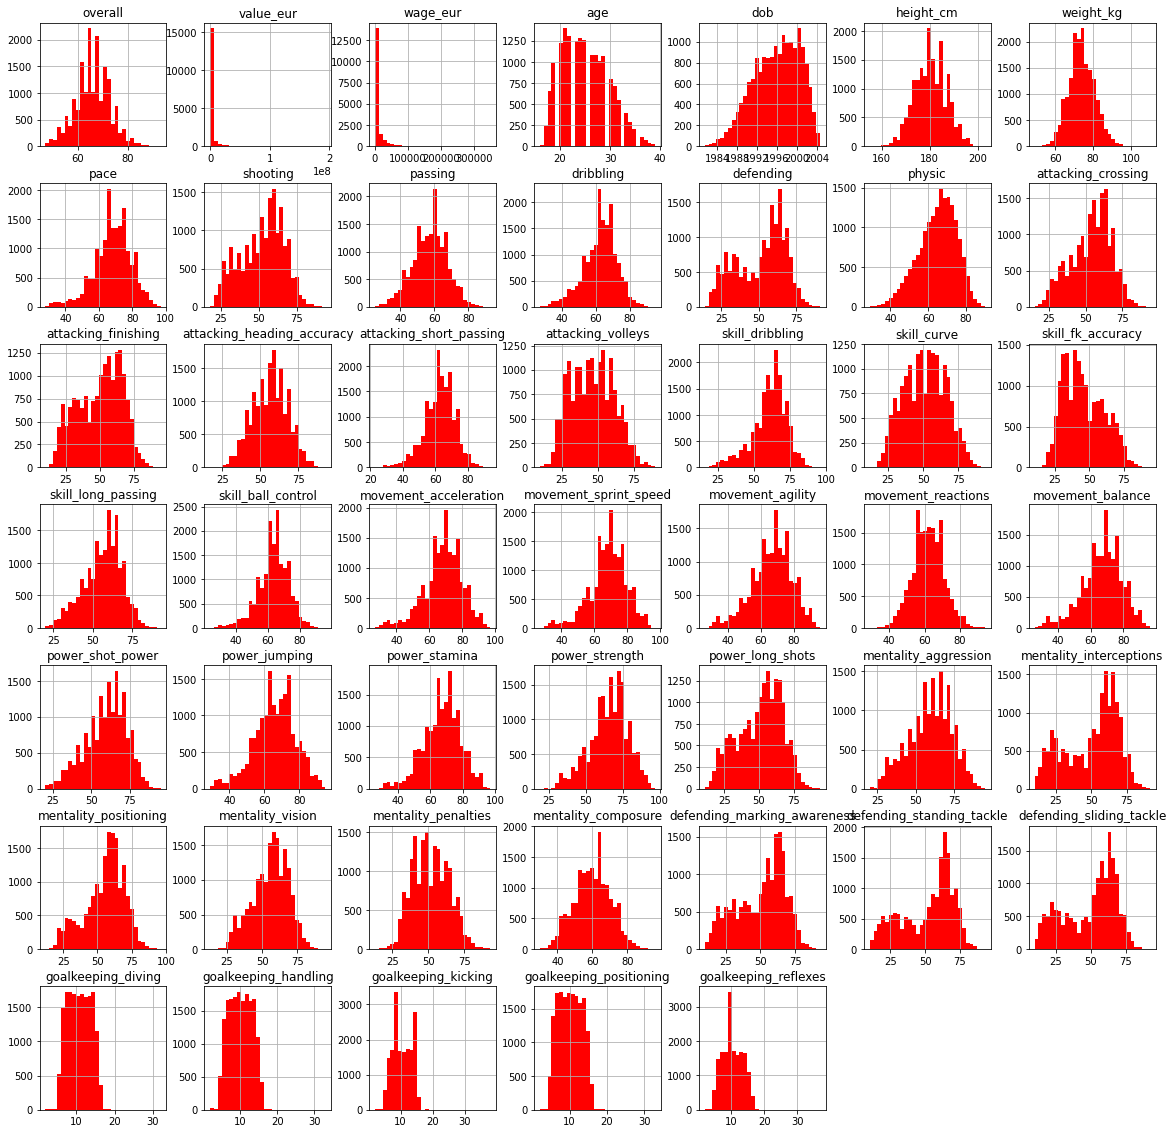

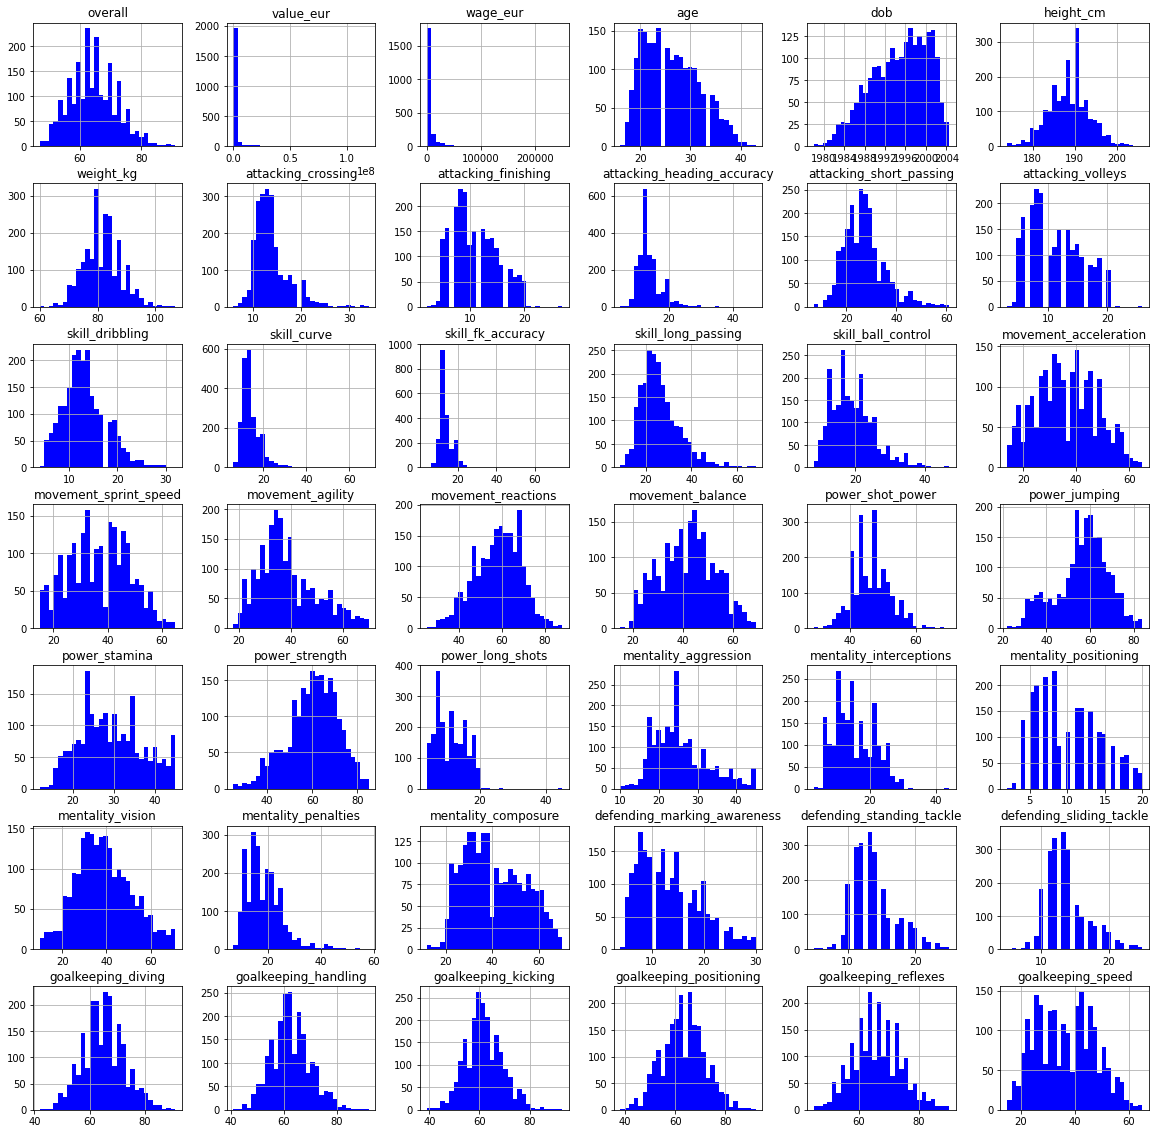

In [70]:
#Dropeamos las columnas extra del dataset de arqueros
df_g = df_g.drop(columns=['sofifa_id',	'player_url',	'short_name',	'potential',	'club_team_id',	'league_level',	'club_jersey_number',	'club_joined',	'club_loaned_from',	'club_contract_valid_until',	'nationality_id',	'nation_position',	'weak_foot',	'skill_moves',	'international_reputation',	'work_rate',	'body_type',	'real_face',	'player_tags',	'player_traits','ls','st',	'rs',	'lw',	'lf',	'cf',	'rf',	'rw',	'lam',	'cam',	'ram',	'lm',	'lcm',	'cm',	'rcm',	'rm',	'lwb',	'ldm',	'cdm',	'rdm',	'rwb',	'lb',	'lcb',	'cb',	'rcb',	'rb',	'gk',	'player_face_url',	'club_logo_url',	'club_flag_url',	'nation_logo_url',	'nation_flag_url']) 
#Dropeamos las columnas extra del dataset de jugadores
df_p = df_p.drop(columns=['sofifa_id',	'player_url',	'short_name',	'potential',	'club_team_id',	'league_level',	'club_jersey_number',	'club_joined',	'club_loaned_from',	'club_contract_valid_until',	'nationality_id',	'nation_position',	'weak_foot',	'skill_moves',	'international_reputation',	'work_rate',	'body_type',	'real_face',	'player_tags',	'player_traits','ls','st',	'rs',	'lw',	'lf',	'cf',	'rf',	'rw',	'lam',	'cam',	'ram',	'lm',	'lcm',	'cm',	'rcm',	'rm',	'lwb',	'ldm',	'cdm',	'rdm',	'rwb',	'lb',	'lcb',	'cb',	'rcb',	'rb',	'gk',	'player_face_url',	'club_logo_url',	'club_flag_url',	'nation_logo_url',	'nation_flag_url']) 
print('Cantidad de datos DF Arqueros', df_g.shape)# Corroboramos como quedan los dataset post reducción
print('Cantidad de datos DF Jugadores', df_p.shape) 
df_p.hist(bins=30, figsize=(20,20), color = 'r') # Graficamos nuevamente las variables de los arqueros (Rojo) VS los jugadores (Azul)
df_g.hist(bins=30, figsize=(20,20), color = 'b') 

In [71]:
df_g.describe() #Revisamos los datos de ambos dataset con un describe

overall     value_eur       wage_eur          age   height_cm  \
count  2124.000000  2.124000e+03    2124.000000  2124.000000  2124.00000   
mean     64.395480  1.930765e+06    6349.952919    26.185499   188.51742   
std       7.566561  6.658081e+06   15608.132686     5.515145     4.74038   
min      47.000000  9.000000e+03     500.000000    16.000000   174.00000   
25%      59.000000  2.500000e+05     750.000000    22.000000   185.00000   
50%      64.000000  5.000000e+05    2000.000000    25.000000   188.00000   
75%      69.000000  1.200000e+06    5000.000000    30.000000   192.00000   
max      91.000000  1.195000e+08  250000.000000    43.000000   206.00000   

         weight_kg  attacking_crossing  attacking_finishing  \
count  2124.000000         2124.000000          2124.000000   
mean     81.677966           13.832392            10.927495   
std       6.294834            3.626090             4.133593   
min      60.000000            6.000000             2.000000   
25%      78.000000           11.000000             8.000000   
50%      81.000000           13.000000            10.000000   
75%      86.000000           15.000000            14.000000   
max     107.000000           34.000000            27.000000   

       attacking_heading_accuracy  attacking_short_passing  ...  \
count                 2124.000000              2124.000000  ...   
mean                    13.907250                27.092750  ...   
std                      3.732628                 8.064061  ...   
min                      5.000000                 7.000000  ...   
25%                     11.000000                22.000000  ...   
50%                     13.000000                26.000000  ...   
75%                     15.000000                31.000000  ...   
max                     47.000000                61.000000  ...   

       mentality_composure  defending_marking_awareness  \
count          2124.000000                  2124.000000   
mean             40.889831                    13.563089   
std              12.776093                     5.955185   
min              12.000000                     4.000000   
25%              30.000000                     9.000000   
50%              39.000000                    12.000000   
75%              51.000000                    18.000000   
max              70.000000                    30.000000   

       defending_standing_tackle  defending_sliding_tackle  \
count                2124.000000               2124.000000   
mean                   13.723164                 13.618173   
std                     3.201891                  3.149093   
min                     5.000000                  5.000000   
25%                    11.000000                 11.000000   
50%                    13.000000                 13.000000   
75%                    15.000000                 15.000000   
max                    25.000000                 25.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count         2124.000000           2124.000000          2124.000000   
mean            64.984463             62.696328            61.730226   
std              7.534267              7.247691             7.341813   
min             42.000000             41.000000            39.000000   
25%             60.000000             58.000000            57.000000   
50%             65.000000             62.000000            61.000000   
75%             70.000000             67.000000            66.000000   
max             91.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  goalkeeping_speed  
count              2124.000000           2124.000000        2124.000000  
mean                 63.182674             65.900188          36.439266  
std                   8.468142              8.024364          10.750788  
min                  38.000000             45.000000          15.000000  
25%                  57.000000             6

In [72]:
df_p.describe() #Revisamos los datos de ambos dataset con un describe

overall     value_eur       wage_eur           age     height_cm  \
count  17041.000000  1.704100e+04   17041.000000  17041.000000  17041.000000   
mean      65.930286  2.965082e+06    9354.732703     25.065959    180.389179   
std        6.773755  7.717024e+06   19880.724994      4.605071      6.545547   
min       47.000000  1.500000e+04     500.000000     16.000000    155.000000   
25%       62.000000  5.250000e+05    1000.000000     21.000000    176.000000   
50%       66.000000  1.000000e+06    3000.000000     25.000000    180.000000   
75%       70.000000  2.100000e+06    9000.000000     28.000000    185.000000   
max       93.000000  1.940000e+08  350000.000000     39.000000    203.000000   

          weight_kg          pace      shooting       passing     dribbling  \
count  17041.000000  17041.000000  17041.000000  17041.000000  17041.000000   
mean      74.089314     68.235491     52.327446     57.298163     62.556716   
std        6.696454     10.905376     14.052085     10.068871      9.653533   
min       49.000000     28.000000     18.000000     25.000000     27.000000   
25%       70.000000     62.000000     42.000000     51.000000     57.000000   
50%       74.000000     69.000000     54.000000     58.000000     64.000000   
75%       78.000000     76.000000     63.000000     64.000000     69.000000   
max      110.000000     97.000000     94.000000     93.000000     95.000000   

       ...  mentality_penalties  mentality_composure  \
count  ...         17041.000000         17041.000000   
mean   ...            51.485535            60.019835   
std    ...            12.399882            10.262801   
min    ...            13.000000            30.000000   
25%    ...            42.000000            53.000000   
50%    ...            51.000000            60.000000   
75%    ...            61.000000            67.000000   
max    ...            93.000000            96.000000   

       defending_marking_awareness  defending_standing_tackle  \
count                 17041.000000               17041.000000   
mean                     50.699137                  52.315768   
std                      17.369045                  18.449722   
min                      10.000000                  10.000000   
25%                      37.000000                  37.000000   
50%                      55.000000                  59.000000   
75%                      64.000000                  66.000000   
max                      93.000000                  93.000000   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
count              17041.000000        17041.000000          17041.000000   
mean                  49.920427           10.346165             10.393815   
std                   18.354884            3.014197              2.996654   
min                   10.000000            2.000000              2.000000   
25%                   34.000000            8.000000              8.000000   
50%                   56.000000           10.000000             10.000000   
75%                   64.000000           13.000000             13.000000   
max                   92.000000           32.000000             33.000000   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
count         17041.000000             17041.000000          17041.000000  
mean             10.359721                10.372279             10.331377  
std               3.038031                 3.003834              3.033476  
min               2.000000                 2.000000              2.000000  
25%               8.000000                 8.000000              8.000000  
50%              10.000000                10.000000             10.000000  
75%              13.000000                13.000000             13.000000  
max              38.000000                33.000000             37.000000  

[8 rows x 46 columns]

## Análisis de correlaciones
Además implementamos un gráfico de calor que indica en un tono mas "claro" un alto nivel de correlación de su "skill" con le "overall" así como un tono mas oscuro, a aquellos "skill" que tienen poca correlación con el "overall"

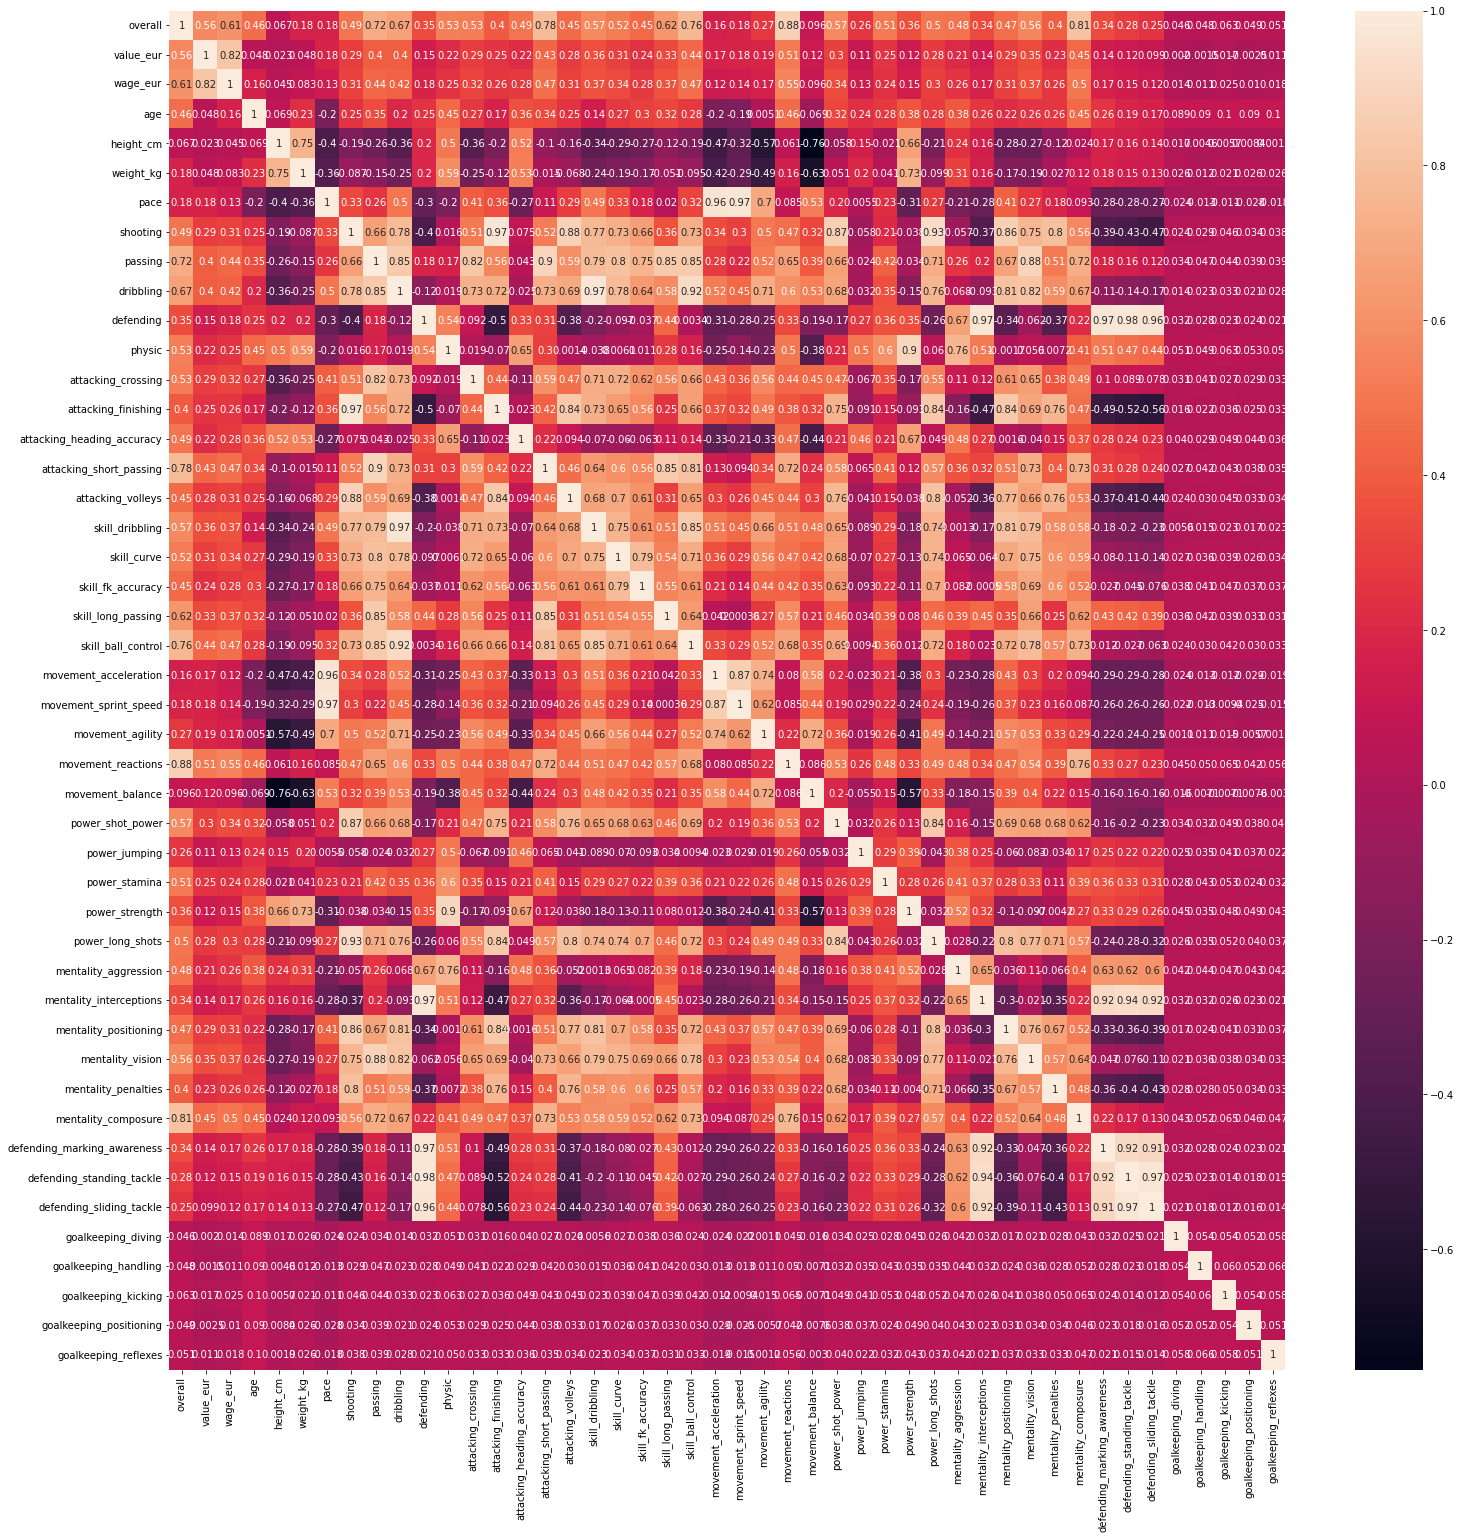

In [73]:
correlations = df_p.corr()
f, ax = plt.subplots(figsize = (25, 25))
sns.heatmap(correlations, annot=True)

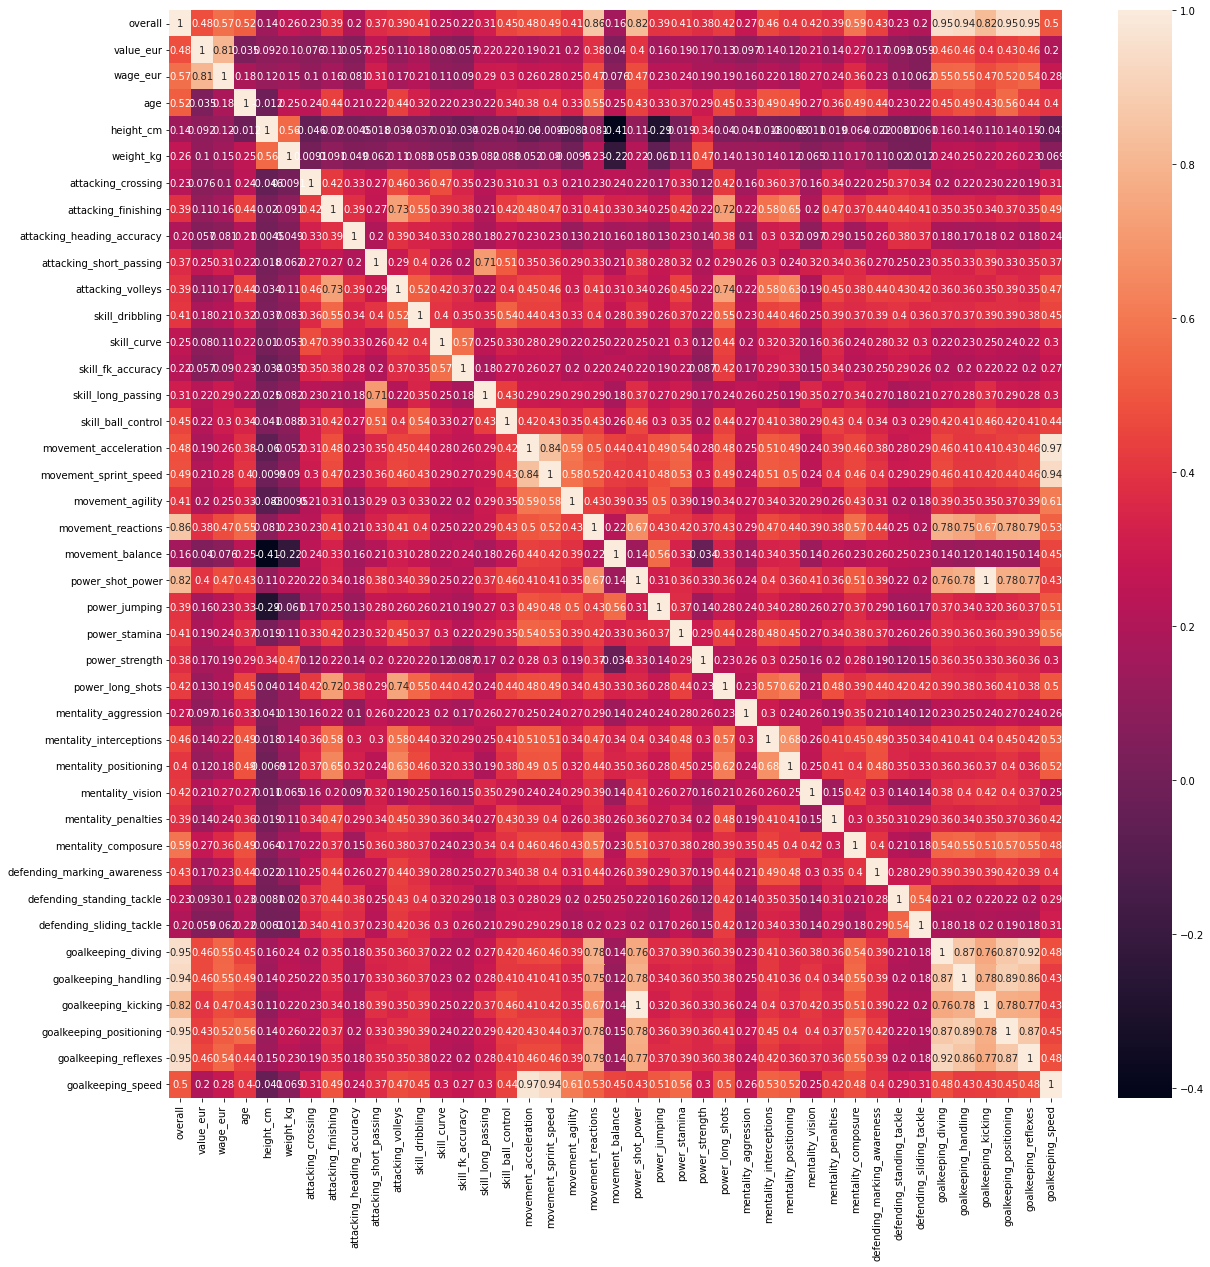

In [74]:
correlations = df_g.corr() #Analizamos las correlaciones de los data set, para conocer e identificar qué variables tienen correlación
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot=True)

In [75]:
##En base al análisis de las correlaciones, nos percatamos que tomando los gráficos realizados, existe una correlacion entre el overall y salario, pero la misma es muy debil (0.56)
## A continuación analizamos algunas variables que SI tienen relación, como por ejemplo la habilidad de defensa, con la mentalidad del jugador para interceptar los pases

## Analizando el impacto de variables correlacionadas
A modo de prueba, tomamos una de las variables que tiene un alto nivel de "Correlación" con el "overall" para ver si efectivamente podemos constatar esto gráficamente, teniendo como resultado un buen nivel de respuesta entre las variables

Text(0, 0.5, 'Habilidad de interceptar el balón')

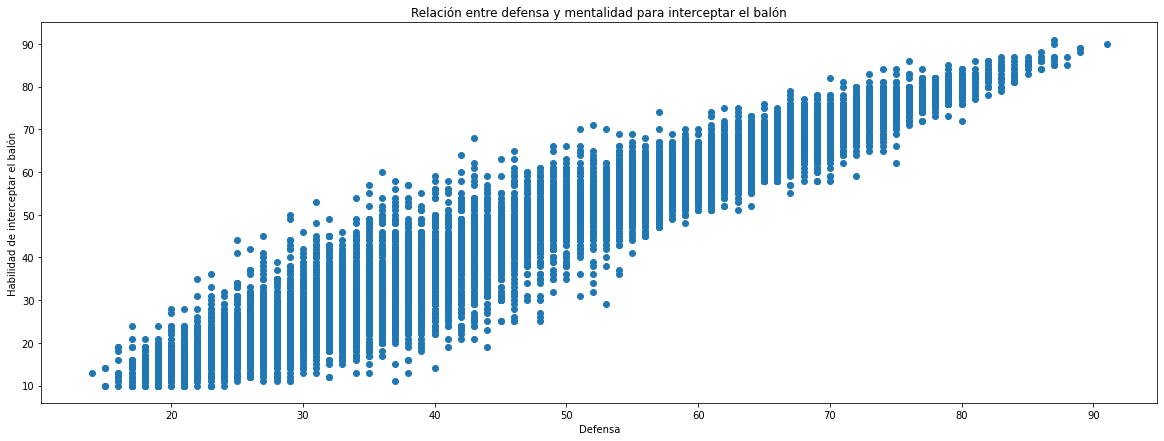

In [76]:
fig , ax = plt.subplots(figsize= (20,7)) #De esta forma, encontramos las primeras relaciones para poder avanzar con los modelos de aprendizaje
mapeo_colores = ax.scatter(df_p['defending'], df_p['mentality_interceptions'])
ax.set_title('Relación entre defensa y mentalidad para interceptar el balón')
ax.set_xlabel('Defensa')
ax.set_ylabel('Habilidad de interceptar el balón')

## Preparación de datos para nuestro modelo predictivo (Regresión logística)
 Procedemos a normalizar las varibales para poder generar nuestro modelo de predicción

In [77]:
## Además también avanzamos con determinar cuales son las variables categóricas para prepararlas para nuestro modelo.
print (df_g.info(1))

print (df_p.info(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   long_name                    2124 non-null   object        
 1   player_positions             2124 non-null   object        
 2   overall                      2124 non-null   int64         
 3   value_eur                    2124 non-null   float64       
 4   wage_eur                     2124 non-null   float64       
 5   age                          2124 non-null   int64         
 6   dob                          2124 non-null   datetime64[ns]
 7   height_cm                    2124 non-null   int64         
 8   weight_kg                    2124 non-null   int64         
 9   club_name                    2124 non-null   object        
 10  league_name                  2124 non-null   object        
 11  club_position                2124 non-null 

In [78]:
#Para comenzar a generar nuestro modelo, agrupamos las 2 variables categóricas
# dentro de las cuales clasificamos el dataset, solo incluimos "posición" y "pie 
#habil", dejando de lado valores como el nombre y la liga/nacionalidad, ya que son datos que no contribuirán a nuestro análisis
X_cat_df_g = df_g[['new_pos', 'preferred_foot']]
X_cat_df_p = df_p[['new_pos', 'preferred_foot']]
#Utilizamos el método de One Hot Encoder para transformar nuestras variables categóricas
onehotencoder = OneHotEncoder()
X_cat_df_g = onehotencoder.fit_transform(X_cat_df_g).toarray()
X_cat_df_p = onehotencoder.fit_transform(X_cat_df_p).toarray()
print (X_cat_df_p.shape)
print (X_cat_df_g.shape)
X_cat_df_p = pd.DataFrame(X_cat_df_p)
X_cat_df_g = pd.DataFrame(X_cat_df_g)
## Generamos una variable con nuestras features numéricas (Dejando fuera "overall", ya que será nuestra variable objetivo e incluyendo las variables pertintentes por un lado para "jugadores" y por otro para "arqueros")

X_numerical_df_p = df_p[['value_eur', 'wage_eur','age','height_cm','weight_kg','pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']]
X_numerical_df_g = df_g[['value_eur', 'wage_eur','age','height_cm','weight_kg','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes', 'goalkeeping_speed']]
X_all_df_p = pd.concat([X_cat_df_p, X_numerical_df_p], axis = 1)
X_all_df_g = pd.concat([X_cat_df_g, X_numerical_df_g], axis = 1)
X_all_df_p

(17041, 5)
(2124, 3)


0    1    2    3    4    value_eur  wage_eur  age  height_cm  \
0      0.0  1.0  0.0  1.0  0.0   78000000.0  320000.0   34        170   
1      0.0  1.0  0.0  0.0  1.0  119500000.0  270000.0   32        185   
2      0.0  1.0  0.0  0.0  1.0   45000000.0  270000.0   36        187   
3      0.0  1.0  0.0  0.0  1.0  129000000.0  270000.0   29        175   
4      0.0  0.0  1.0  0.0  1.0  125500000.0  350000.0   30        181   
...    ...  ...  ...  ...  ...          ...       ...  ...        ...   
17036  0.0  0.0  1.0  0.0  1.0      70000.0    1000.0   22        180   
17037  0.0  0.0  1.0  0.0  1.0     110000.0     500.0   19        175   
17038  0.0  0.0  1.0  0.0  1.0     100000.0     500.0   21        178   
17039  0.0  1.0  0.0  0.0  1.0     110000.0     500.0   19        173   
17040  0.0  0.0  1.0  0.0  1.0     110000.0     500.0   19        167   

       weight_kg  ...  mentality_penalties  mentality_composure  \
0             72  ...                   75                   96   
1             81  ...                   90                   88   
2             83  ...                   88                   95   
3             68  ...                   93                   93   
4             70  ...                   83                   89   
...          ...  ...                  ...                  ...   
17036         64  ...                   42                   37   
17037         70  ...                   44                   47   
17038         72  ...                   39                   36   
17039         66  ...                   49                   47   
17040         61  ...                   35                   36   

       defending_marking_awareness  defending_standing_tackle  \
0                               20                         35   
1                               35                         42   
2                               24                         32   
3                               35                         32   
4                               68                         65   
...                            ...                        ...   
17036                           38                         43   
17037                           37                         44   
17038                           38                         44   
17039                           10                         14   
17040                           33                         31   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                            24                   6                    11   
1                            19                  15                     6   
2                            24                   7                    11   
3                            29                   9                     9   
4                            53                  15                    13   
...                         ...                 ...                   ...   
17036                        48                   6                    10   
17037                        47                  11                    12   
17038                        48                   8                     6   
17039                        11                   7                    10   
17040                        37                   8                    13   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
0                       15                       14                     8  
1                       12                        8                    10  
2                       15                       14                    11  
3                       15                       15                    11  
4                        5                       10                    13  
...                    ...                      ...                   ...  
17036                    5                       15                    13  
17037        

In [79]:
#Utilizamos Sklearn para standarizar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
X_df_p = scaler.fit_transform(X_all_df_p)
X_df_g = scaler.fit_transform(X_all_df_g)
y_df_p = df_p['overall']
y_df_g = df_g['overall']
#Establecemos los detalles de cada modelo (para jugadores y arqueros)
X_train_df_p, X_test_df_p, y_train_df_p, y_test_df_p = train_test_split(X_df_p, y_df_p, test_size = 0.25)
X_train_df_g, X_test_df_g, y_train_df_g, y_test_df_g = train_test_split(X_df_g, y_df_g, test_size = 0.25)
#Utilizamos el modelo de regresión logística y el puntaje de Accuracy
model_df_p = LogisticRegression()
model_df_p.fit(X_train_df_p, y_train_df_p)
y_pred_df_p = model_df_p.predict(X_test_df_p)
model_df_g = LogisticRegression()
model_df_g.fit(X_train_df_g, y_train_df_g)
y_pred_df_g = model_df_g.predict(X_test_df_g)
print('Accuracy Jugadores {} %'.format(100*accuracy_score(y_pred_df_p, y_test_df_p)))
print('Accuracy Arqueros {} %'.format(100*accuracy_score(y_pred_df_g, y_test_df_g)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Accuracy Jugadores 14.339356958460456 %
Accuracy Arqueros 11.67608286252354 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Finalmente observamos que el primer modelo que generamos, nos arroja un muy bajo nivel de "accuracy" o "precisión de predicción"**

**Accuracy Jugadores 14.761793006336541 %**

**Accuracy Arqueros 15.065913370998116 %**

 **Es por esto que debemos repensar nuestro modelo, para encontrar uno que tenga un mayor nivel de respuesta**



## Generamos nuevamente el modelo de predicción con un mayor nivel de accuracy (Linear Regression)
 En base al análisis realizado y el modelo predictivo ejecutado (testeando el % de accuracy). Podemos inferir que el modelo no tiene un nivel de fiabilidad aceptable. 
 Inferimos que esto se debe a la escasa correlacion que mantienen la mayoria de las variables con el overall, así como también, al método de regresión logística empleado.
  A continuación llevaremos adelante otro modelo predictivo, utilizando de regresión lineal y variables que mantengan un mayor nivel de coorrelación.

In [80]:
## Generamos una variable con nuestras features numéricas (Dejando fuera "overall", ya que será nuestra variable objetivo e incluyendo las variables pertintentes por un lado para "jugadores" y por otro para "arqueros")
X_numerical_df_p2 = df_p[['value_eur', 'wage_eur','age','height_cm','weight_kg','pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']]
y_df_p2 = df_p[['overall']]
%matplotlib inline
x_df_p2 = preprocessing.StandardScaler().fit(X_numerical_df_p2).transform(X_numerical_df_p2.astype(float))
print(x_df_p2.shape)
print(y_df_p2.shape)
x_df_p2_train, x_df_p2_test, y_df_p2_train, y_df_p2_test = train_test_split(x_df_p2,y_df_p2,  test_size=0.2, random_state = 4)
regr = linear_model.LinearRegression()
regr.fit(x_df_p2_train, y_df_p2_train)
y_hat_df_p2 = regr.predict(x_df_p2_test)
metrics.r2_score(y_hat_df_p2, y_df_p2_test)

(17041, 45)
(17041, 1)


0.8953816894832056

##Analizando el "Overfitting"
**Finalmente encontramos un modelo con un muy buen nivel de respuesta (
0.8953816894832056%) . En base al análisis de overfitting, el modelo cuenta con un alto accuracy, pero fue creado utilizando todas las variables disponbiles (Las correlacionadas y las que no tienen alto nivel de coorrelación), por lo que inferimos que no es un modelo overfitteado. No obstante, con finalidad de aprendizaje y testeo, a continuación utilizaremos el mismo modelo, pero solo, usando las variables con mayor nivel de correlación**

In [81]:
## Generamos una variable con nuestras features numéricas (Dejando fuera "overall", ya que será nuestra variable objetivo e incluyendo las variables pertintentes por un lado para "jugadores" y por otro para "arqueros")
X_numerical_df_p3 = df_p[['passing','dribbling','attacking_short_passing','movement_reactions','mentality_composure']]
y_df_p3 = df_p[['overall']]
%matplotlib inline
x_df_p3 = preprocessing.StandardScaler().fit(X_numerical_df_p3).transform(X_numerical_df_p3.astype(float))
print(x_df_p3.shape)
print(y_df_p3.shape)
x_df_p3_train, x_df_p3_test, y_df_p3_train, y_df_p3_test = train_test_split(x_df_p3,y_df_p3,  test_size=0.2, random_state = 4)
regr = linear_model.LinearRegression()
regr.fit(x_df_p3_train, y_df_p3_train)
y_hat_df_p3 = regr.predict(x_df_p3_test)
metrics.r2_score(y_hat_df_p3, y_df_p3_test)

(17041, 5)
(17041, 1)


0.8131411691201561

En base a la conclusión, utilizando solo 5 variables con un alto nivel de coorrelación, en un modelo que asumimos, está overfitteado, conseguimos un nivel de respuesta de un 0.81%. Mientras que tomando 45 variables entre las cuales habían pocas variables coorrelacionadas (las 5 anteriores). Obtuvimos un nivel de respuesta mucho mejor, (0.89%). Como conclusión resumimos lo siguiente:
- El modelo de aprendizaje que mejor nos funcionó fue el de regresión lineal.
- Es un modelo muy fiable (probablemente, el hecho de tratarse de un video juego donde las habilidades definen el overall, tiene mucha influencia en el alto nivel de respuesta del modelo)

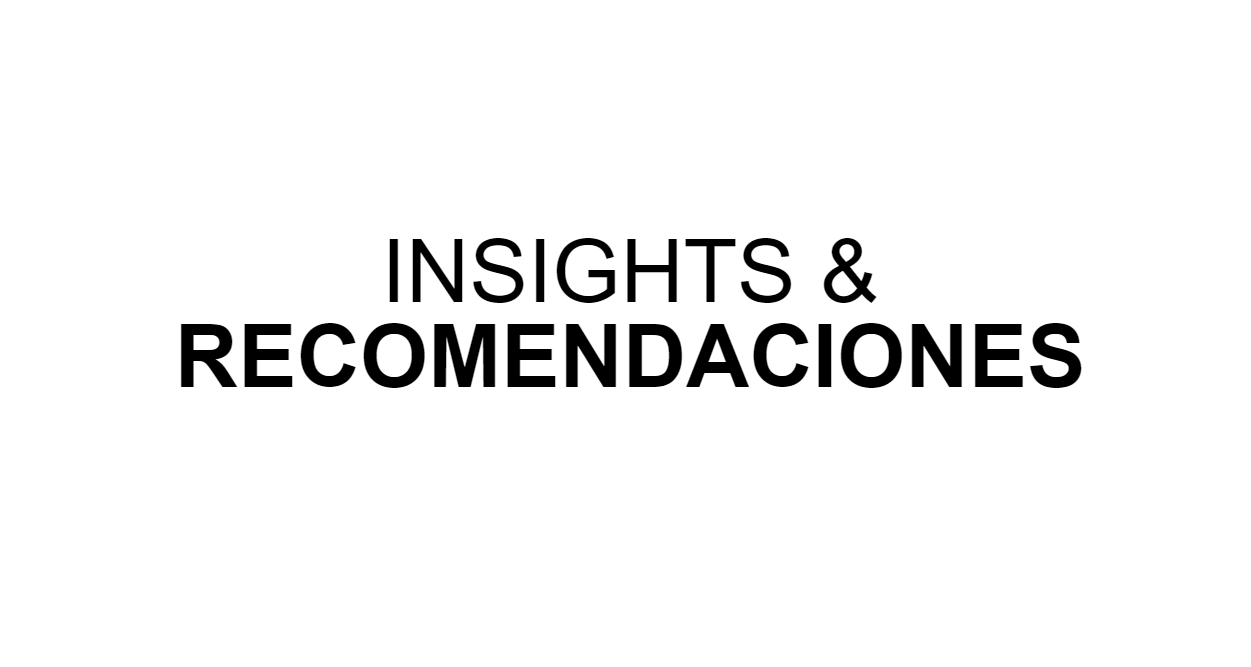

## Análisis Univariado / Bivariado y obtención de Insights

In [82]:
df_p_frec =df_p[['overall']]
df_p_frec  = df_p_frec.groupby('overall').agg('count')
frecuencias_p = df_p[['overall']].groupby('overall').size()
listafrec = frecuencias_p.values
df_p_frec['frecuencias'] = listafrec
df_p_frec

frecuencias
overall             
47                16
48                37
49                64
50                78
51               110
52               158
53               194
54               238
55               273
56               293
57               370
58               405
59               484
60               683
61               679
62               902
63              1009
64              1066
65              1144
66              1019
67              1087
68               973
69               850
70               783
71               700
72               659
73               597
74               414
75               456
76               292
77               248
78               184
79               139
80               101
81                90
82                72
83                52
84                40
85                25
86                20
87                15
88                 7
89                 7
90                 2
91                 4
92                 1
93                 1

In [83]:
from statistics import median

In [84]:
array = df_p[['overall']]


In [85]:
lista_overall = np.array(array)

In [86]:
lista_overall.mean() #Calculamos el promedio utilizando  ".mean"

65.93028578135086

In [87]:
median(lista_overall) #Y utilizamos la libreria de statistics para calcular la mediana

array([66])

In [88]:
q1, q3 = np.percentile(lista_overall, [25,75])

In [89]:
q1

62.0

In [90]:
q3

70.0

In [91]:
np.max(lista_overall)

93

In [92]:
np.min(lista_overall)

47

In [93]:
np.std(lista_overall) #Calculamos la desviación estándar (medida de dispersión)

6.773556090812504

In [94]:
np.var(lista_overall) #Calculamos la varianza

45.88106211538318

In [95]:
rango = np.max(lista_overall) - np.min(lista_overall) #Calculamos el rango - medida de dispersión

In [96]:
rango

46

In [97]:
ric = q3 - q1

In [98]:
ric #Calculamos el rango intercuartílico

8.0

In [99]:
from scipy import stats as s

In [100]:
s.skew(lista_overall) #calculamos la asimetría (Distribución NORMAL entre -0.5 y 0.5)

array([0.06867676])

In [101]:
s.kurtosis(lista_overall)

array([0.13208013])

In [102]:
from seaborn import boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


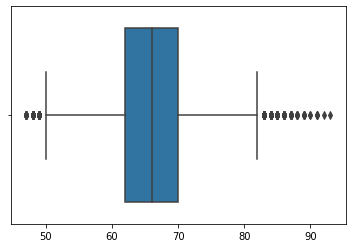

In [103]:
boxplot(lista_overall, orient="v")

In [104]:
df_overall = pd.DataFrame(lista_overall)

In [105]:
df_overall

0
0      93
1      92
2      91
3      91
4      91
...    ..
17036  47
17037  47
17038  47
17039  47
17040  47

[17041 rows x 1 columns]

In [106]:
df_overall.rename(columns={0: 'Overall'}, inplace=True)

In [107]:
df_overall

Overall
0           93
1           92
2           91
3           91
4           91
...        ...
17036       47
17037       47
17038       47
17039       47
17040       47

[17041 rows x 1 columns]

In [108]:
n = df_overall.shape[0]

In [109]:
n

17041

In [110]:
frecuencias = pd.DataFrame(df_overall['Overall'].value_counts())

In [111]:
frecuencias

Overall
65     1144
67     1087
64     1066
66     1019
63     1009
68      973
62      902
69      850
70      783
71      700
60      683
61      679
72      659
73      597
59      484
75      456
74      414
58      405
57      370
56      293
76      292
55      273
77      248
54      238
53      194
78      184
52      158
79      139
51      110
80      101
81       90
50       78
82       72
49       64
83       52
84       40
48       37
85       25
86       20
47       16
87       15
88        7
89        7
91        4
90        2
92        1
93        1

In [112]:
frecuencias = frecuencias.reset_index()

In [113]:
frecuencias

index  Overall
0      65     1144
1      67     1087
2      64     1066
3      66     1019
4      63     1009
5      68      973
6      62      902
7      69      850
8      70      783
9      71      700
10     60      683
11     61      679
12     72      659
13     73      597
14     59      484
15     75      456
16     74      414
17     58      405
18     57      370
19     56      293
20     76      292
21     55      273
22     77      248
23     54      238
24     53      194
25     78      184
26     52      158
27     79      139
28     51      110
29     80      101
30     81       90
31     50       78
32     82       72
33     49       64
34     83       52
35     84       40
36     48       37
37     85       25
38     86       20
39     47       16
40     87       15
41     88        7
42     89        7
43     91        4
44     90        2
45     92        1
46     93        1

In [114]:
frecuencias = frecuencias.rename(columns = {'index' : 'overall','Overall' : 'fa'})

In [115]:
frecuencias

overall    fa
0        65  1144
1        67  1087
2        64  1066
3        66  1019
4        63  1009
5        68   973
6        62   902
7        69   850
8        70   783
9        71   700
10       60   683
11       61   679
12       72   659
13       73   597
14       59   484
15       75   456
16       74   414
17       58   405
18       57   370
19       56   293
20       76   292
21       55   273
22       77   248
23       54   238
24       53   194
25       78   184
26       52   158
27       79   139
28       51   110
29       80   101
30       81    90
31       50    78
32       82    72
33       49    64
34       83    52
35       84    40
36       48    37
37       85    25
38       86    20
39       47    16
40       87    15
41       88     7
42       89     7
43       91     4
44       90     2
45       92     1
46       93     1

In [116]:
tabla = frecuencias.sort_values('overall')

In [117]:
tabla.reset_index(inplace = True, drop = True)

In [118]:
tabla

overall    fa
0        47    16
1        48    37
2        49    64
3        50    78
4        51   110
5        52   158
6        53   194
7        54   238
8        55   273
9        56   293
10       57   370
11       58   405
12       59   484
13       60   683
14       61   679
15       62   902
16       63  1009
17       64  1066
18       65  1144
19       66  1019
20       67  1087
21       68   973
22       69   850
23       70   783
24       71   700
25       72   659
26       73   597
27       74   414
28       75   456
29       76   292
30       77   248
31       78   184
32       79   139
33       80   101
34       81    90
35       82    72
36       83    52
37       84    40
38       85    25
39       86    20
40       87    15
41       88     7
42       89     7
43       90     2
44       91     4
45       92     1
46       93     1

In [119]:
tabla['fr'] = tabla['fa'] / n

In [120]:
tabla['f%'] = tabla['fr'] * 100

In [121]:
tabla

overall    fa        fr        f%
0        47    16  0.000939  0.093891
1        48    37  0.002171  0.217123
2        49    64  0.003756  0.375565
3        50    78  0.004577  0.457720
4        51   110  0.006455  0.645502
5        52   158  0.009272  0.927176
6        53   194  0.011384  1.138431
7        54   238  0.013966  1.396632
8        55   273  0.016020  1.602019
9        56   293  0.017194  1.719383
10       57   370  0.021712  2.171234
11       58   405  0.023766  2.376621
12       59   484  0.028402  2.840209
13       60   683  0.040080  4.007981
14       61   679  0.039845  3.984508
15       62   902  0.052931  5.293117
16       63  1009  0.059210  5.921014
17       64  1066  0.062555  6.255501
18       65  1144  0.067132  6.713221
19       66  1019  0.059797  5.979696
20       67  1087  0.063787  6.378734
21       68   973  0.057098  5.709759
22       69   850  0.049880  4.987970
23       70   783  0.045948  4.594801
24       71   700  0.041077  4.107740
25       72   659  0.038671  3.867144
26       73   597  0.035033  3.503316
27       74   414  0.024294  2.429435
28       75   456  0.026759  2.675899
29       76   292  0.017135  1.713514
30       77   248  0.014553  1.455314
31       78   184  0.010797  1.079749
32       79   139  0.008157  0.815680
33       80   101  0.005927  0.592688
34       81    90  0.005281  0.528138
35       82    72  0.004225  0.422510
36       83    52  0.003051  0.305146
37       84    40  0.002347  0.234728
38       85    25  0.001467  0.146705
39       86    20  0.001174  0.117364
40       87    15  0.000880  0.088023
41       88     7  0.000411  0.041077
42       89     7  0.000411  0.041077
43       90     2  0.000117  0.011736
44       91     4  0.000235  0.023473
45       92     1  0.000059  0.005868
46       93     1  0.000059  0.005868

In [122]:
tabla['FAcum'] = tabla['fa'].cumsum()

In [123]:
tabla['FAcum%'] = tabla['fr'].cumsum()

In [124]:
tabla

overall    fa        fr        f%  FAcum    FAcum%
0        47    16  0.000939  0.093891     16  0.000939
1        48    37  0.002171  0.217123     53  0.003110
2        49    64  0.003756  0.375565    117  0.006866
3        50    78  0.004577  0.457720    195  0.011443
4        51   110  0.006455  0.645502    305  0.017898
5        52   158  0.009272  0.927176    463  0.027170
6        53   194  0.011384  1.138431    657  0.038554
7        54   238  0.013966  1.396632    895  0.052520
8        55   273  0.016020  1.602019   1168  0.068541
9        56   293  0.017194  1.719383   1461  0.085734
10       57   370  0.021712  2.171234   1831  0.107447
11       58   405  0.023766  2.376621   2236  0.131213
12       59   484  0.028402  2.840209   2720  0.159615
13       60   683  0.040080  4.007981   3403  0.199695
14       61   679  0.039845  3.984508   4082  0.239540
15       62   902  0.052931  5.293117   4984  0.292471
16       63  1009  0.059210  5.921014   5993  0.351681
17       64  1066  0.062555  6.255501   7059  0.414236
18       65  1144  0.067132  6.713221   8203  0.481368
19       66  1019  0.059797  5.979696   9222  0.541165
20       67  1087  0.063787  6.378734  10309  0.604953
21       68   973  0.057098  5.709759  11282  0.662050
22       69   850  0.049880  4.987970  12132  0.711930
23       70   783  0.045948  4.594801  12915  0.757878
24       71   700  0.041077  4.107740  13615  0.798955
25       72   659  0.038671  3.867144  14274  0.837627
26       73   597  0.035033  3.503316  14871  0.872660
27       74   414  0.024294  2.429435  15285  0.896954
28       75   456  0.026759  2.675899  15741  0.923713
29       76   292  0.017135  1.713514  16033  0.940849
30       77   248  0.014553  1.455314  16281  0.955402
31       78   184  0.010797  1.079749  16465  0.966199
32       79   139  0.008157  0.815680  16604  0.974356
33       80   101  0.005927  0.592688  16705  0.980283
34       81    90  0.005281  0.528138  16795  0.985564
35       82    72  0.004225  0.422510  16867  0.989789
36       83    52  0.003051  0.305146  16919  0.992841
37       84    40  0.002347  0.234728  16959  0.995188
38       85    25  0.001467  0.146705  16984  0.996655
39       86    20  0.001174  0.117364  17004  0.997829
40       87    15  0.000880  0.088023  17019  0.998709
41       88     7  0.000411  0.041077  17026  0.999120
42       89     7  0.000411  0.041077  17033  0.999531
43       90     2  0.000117  0.011736  17035  0.999648
44       91     4  0.000235  0.023473  17039  0.999883
45       92     1  0.000059  0.005868  17040  0.999941
46       93     1  0.000059  0.005868  17041  1.000000

In [125]:
q2 = np.median(df_overall['Overall'])

In [126]:
q2

66.0

In [127]:
q1 = np.percentile(df_overall['Overall'],25)
q2 = np.percentile(df_overall['Overall'],50)
q3 = np.percentile(df_overall['Overall'],75)
q4 = np.percentile(df_overall['Overall'],100)

In [128]:
print ("Q1 = ", q1)
print ('Q2 = ', q2)
print ('Q3 = ', q3)
print ('Q4 = ', q4)

Q1 =  62.0
Q2 =  66.0
Q3 =  70.0
Q4 =  93.0


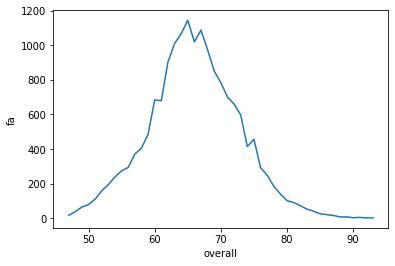

In [129]:
sns.lineplot(x = "overall", y = "fa", data=tabla) #Graficamos el detalle de overall con las frecuencias acumuladas para observar la distribución de las frecuencias

In [130]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [131]:
df_p.describe().T

count          mean           std      min  \
overall                      17041.0  6.593029e+01  6.773755e+00     47.0   
value_eur                    17041.0  2.965082e+06  7.717024e+06  15000.0   
wage_eur                     17041.0  9.354733e+03  1.988072e+04    500.0   
age                          17041.0  2.506596e+01  4.605071e+00     16.0   
height_cm                    17041.0  1.803892e+02  6.545547e+00    155.0   
weight_kg                    17041.0  7.408931e+01  6.696454e+00     49.0   
pace                         17041.0  6.823549e+01  1.090538e+01     28.0   
shooting                     17041.0  5.232745e+01  1.405208e+01     18.0   
passing                      17041.0  5.729816e+01  1.006887e+01     25.0   
dribbling                    17041.0  6.255672e+01  9.653533e+00     27.0   
defending                    17041.0  5.169110e+01  1.618596e+01     14.0   
physic                       17041.0  6.481263e+01  9.792269e+00     29.0   
attacking_crossing           17041.0  5.401561e+01  1.360355e+01     15.0   
attacking_finishing          17041.0  5.023784e+01  1.624454e+01     10.0   
attacking_heading_accuracy   17041.0  5.648876e+01  1.155755e+01     17.0   
attacking_short_passing      17041.0  6.281679e+01  9.306852e+00     23.0   
attacking_volleys            17041.0  4.634135e+01  1.452821e+01     10.0   
skill_dribbling              17041.0  6.095047e+01  1.189281e+01     16.0   
skill_curve                  17041.0  5.134722e+01  1.474918e+01     12.0   
skill_fk_accuracy            17041.0  4.576521e+01  1.470287e+01     10.0   
skill_long_passing           17041.0  5.641113e+01  1.196058e+01     20.0   
skill_ball_control           17041.0  6.336166e+01  9.544552e+00     24.0   
movement_acceleration        17041.0  6.820498e+01  1.139418e+01     27.0   
movement_sprint_speed        17041.0  6.823884e+01  1.119837e+01     27.0   
movement_agility             17041.0  6.658295e+01  1.216151e+01     26.0   
movement_reactions           17041.0  6.186527e+01  8.705877e+00     29.0   
movement_balance             17041.0  6.685646e+01  1.210251e+01     26.0   
power_shot_power             17041.0  5.916930e+01  1.319040e+01     20.0   
power_jumping                17041.0  6.583610e+01  1.177031e+01     29.0   
power_stamina                17041.0  6.729852e+01  1.122868e+01     26.0   
power_strength               17041.0  6.564163e+01  1.269915e+01     19.0   
power_long_shots             17041.0  5.101174e+01  1.572305e+01     11.0   
mentality_aggression         17041.0  5.924928e+01  1.384660e+01     20.0   
mentality_interceptions      17041.0  5.048600e+01  1.843747e+01     10.0   
mentality_positioning        17041.0  5.533155e+01  1.427002e+01     12.0   
mentality_vision             17041.0  5.583323e+01  1.259687e+01     13.0   
mentality_penalties          17041.0  5.148553e+01  1.239988e+01     13.0   
mentality_composure          17041.0  6.001983e+01  1.026280e+01     30.0   
defending_marking_awareness  17041.0  5.069914e+01  1.736904e+01     10.0   
defending_standing_tackle    17041.0  5.231577e+01  1.844972e+01     10.0   
defending_sliding_tackle     17041.0  4.992043e+01  1.835488e+01     10.0   
goalkeeping_diving           17041.0  1.034617e+01  3.014197e+00      2.0   
goalkeeping_handling         17041.0  1.039381e+01  2.996654e+00      2.0   
goalkeeping_kicking          17041.0  1.035972e+01  3.038031e+00      2.0   
goalkeeping_positioning      17041.0  1.037228e+01  3.003834e+00      2.0   
goalkeeping_reflexes         17041.0  1.033138e+01  3.033476e+00      2.0   

                                  25%        50%        75%          max  
overall                          62.0       66.0       70.0         93.0  
value_eur                    525000.0  1000000.0  2100000.0  194000000.0  
wage_eur                       1000.0     3000.0     9000.0     350000.0  
age                              21.0       25.0       28.0         39.0  
height_cm                       176.

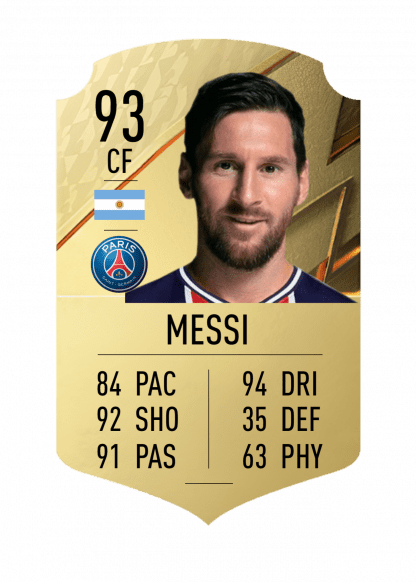

Para nuestro análisis, y por lo extenso de nuestro dataset, nos enfocaremos en 7 variables. Overall, Pace, Shooting, Passing, Dribbling, Defending, Physic, que sumarizan las habilidades de los jugadores, como así también, otras variables categóricas de los jugadores


In [132]:
df_p_7skills = df_p[['overall','pace','shooting','passing','dribbling','defending','physic','nationality_name','preferred_foot','age','height_cm','weight_kg','new_pos']]

In [133]:
df_p_7skills

overall  pace  shooting  passing  dribbling  defending  physic  \
0           93  85.0      92.0     91.0       95.0       34.0    65.0   
1           92  78.0      92.0     79.0       86.0       44.0    82.0   
2           91  87.0      94.0     80.0       88.0       34.0    75.0   
3           91  91.0      83.0     86.0       94.0       37.0    63.0   
4           91  76.0      86.0     93.0       88.0       64.0    78.0   
...        ...   ...       ...      ...        ...        ...     ...   
17036       47  58.0      35.0     46.0       48.0       42.0    49.0   
17037       47  59.0      39.0     50.0       46.0       41.0    51.0   
17038       47  60.0      37.0     45.0       49.0       41.0    52.0   
17039       47  68.0      46.0     36.0       48.0       15.0    42.0   
17040       47  68.0      38.0     45.0       48.0       36.0    48.0   

          nationality_name preferred_foot  age  height_cm  weight_kg  \
0                Argentina           Left   34        170         72   
1                   Poland          Right   32        185         81   
2                 Portugal          Right   36        187         83   
3                   Brazil          Right   29        175         68   
4                  Belgium          Right   30        181         70   
...                    ...            ...  ...        ...        ...   
17036             China PR          Right   22        180         64   
17037  Republic of Ireland          Right   19        175         70   
17038  Republic of Ireland          Right   21        178         72   
17039  Republic of Ireland          Right   19        173         66   
17040                India          Right   19        167         61   

             new_pos  
0          Delantero  
1          Delantero  
2          Delantero  
3          Delantero  
4      Mediocampista  
...              ...  
17036  Mediocampista  
17037  Mediocampista  
17038  Mediocampista  
17039      Delantero  
17040  Mediocampista  

[17041 rows x 13 columns]

In [134]:
from pandas_profiling import ProfileReport
#Solo utilizamos los primeros 10000 datos
prof = ProfileReport(df_p_7skills) 
prof.to_file(output_file='output3.html')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [135]:
prof

Output hidden; open in https://colab.research.google.com to view.

## Insights y Recomendaciones

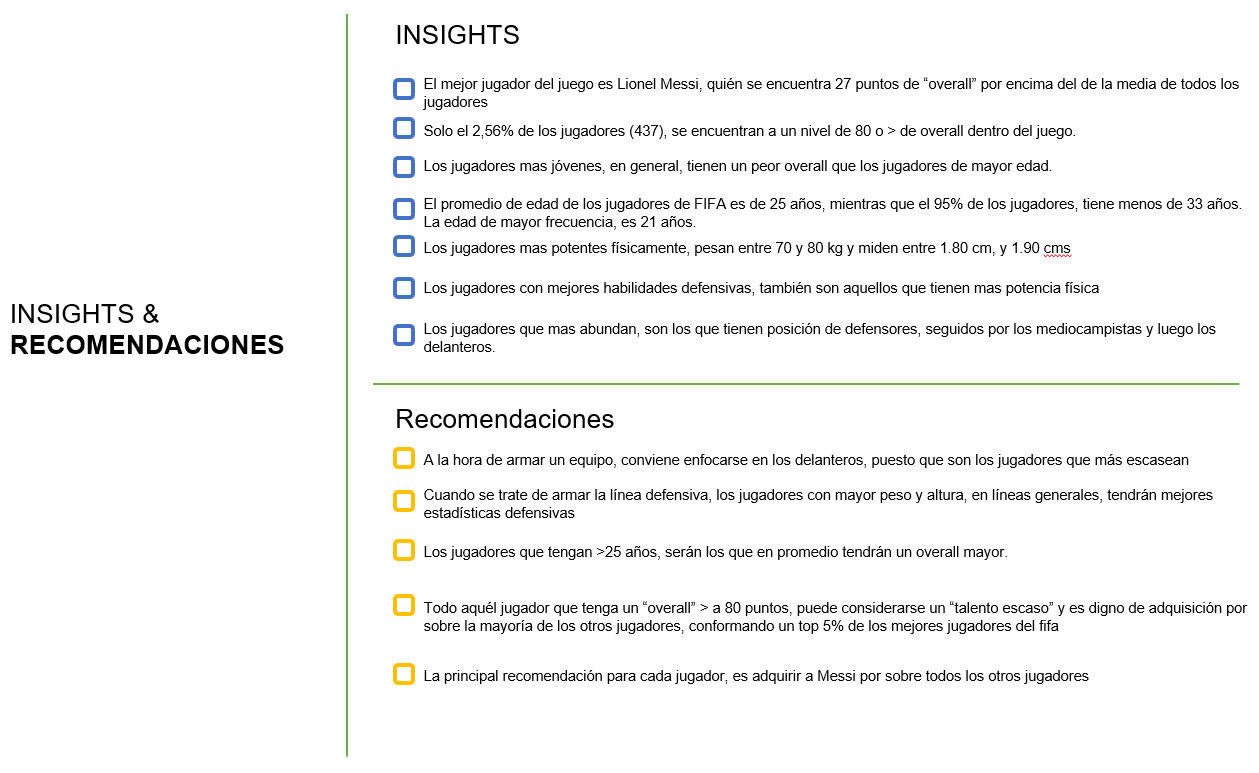